In [1]:
import sklearn

In [2]:
print('available model criterion:')
sorted(sklearn.metrics.SCORERS.keys())

available model criterion:


AttributeError: module 'sklearn' has no attribute 'metrics'

In [6]:
import pandas as pd
import os
import numpy as np

In [7]:
from sklearn.metrics import classification_report, roc_auc_score, auc
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils.fixes import signature
from sklearn.metrics import confusion_matrix, f1_score, average_precision_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, OneClassSVM
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import csv
seed = 7
np.random.seed(seed)

In [8]:
scoring = {'AUC': 'roc_auc', 'Harmonic Mean':'f1','log loss':'neg_log_loss'}

In [9]:
Col=['TenantId2','Det','TenantId','Name','Country','CountryCode','Region','City','CommunicationLanguage','CommunicationCulture',
     'CreatedDate','CreateDateOfFirstSubscription','PurchaseDateOfFirstNonTrialSubscription','TenantState','TenantType',
     'EXOEnabledUsers','LicensedUsers','LYOEnabledUsers','SPOEnabledUsers','OD4BEnabledUsers','ProPlusEnabledUsers','TotalUsers',
     'EDUSubscriptionsCount','ExchangeSubscriptionsCount','LyncSubscriptionsCount','PaidSubscriptionCount',
     'ProjectSubscriptionsCount','SharePointSubscriptionsCount','TotalSubscriptionCount','TrialSubscriptionCount',
     'VisioSubscriptionsCount','HasEducation','HasCharity','HasGovernment','HasExchange','HasLync','HasSharePoint','HasProPlus',
     'HasYammer','HasSubscription','HasProject','HasPaid','HasVisio','HasTrial','DomainCount','CommerceTenantTagsArray',
     'CommerceTenantTagsCount','AssignedPlanServiceTypeArray','AssignedPlanCount','PartnerTenantCount','SubscriptionCount',
     'ConciergeInfoIsConceirge','IsConcierge','ConciergeInfoIsManualAdmittance','ConciergeInfoProgramId',
     'CompanyLastDirSyncTime','DirectoryExtensionsSyncEnabled','DirSyncEnabled','PasswordSyncEnabled','PasswordSyncTime',
     'PasswordWriteBackEnabled','IsDonMT','IsViral','IsTest','IsQuickStart','IsFastTrackTenant','HasSKUE3','HasSKUE5',
     'SPOEnvironment','IsRestrictRmsViralSignUp','IsMSODSDeleted','TotalGroupCount','CurrentDefaultDomain',
     'O365TenantReleaseTrack','DefaultDataLocation','SnapshotTime','MSODSTenant_CompanyTags','MSODSTenant_ExtensionAttributes',
     'MSODSTenant_DirSyncEnabled','CPTenant_ChannelName','FirstTicketAge','FirstTicketDate','LastTicketDate',
     'TotalTickets','MinCloseTime','MaxCloseTime','MedCloseTime','SubscriptionEndDate','DaysToSubEndDate','SubscriptionStartDate',
     'DaysTicketOpenAfterSubStart','TicketsFeedRecency','NumberOfTickets_Past7Days','NumberOfTickets_Past28Days',
     'NumberOfTickets_Past90Days','NumberOfTickets_Past180Days','NumberOfTickets_Past360Days','Age_at_First_Ticket_Bucket',
     'PercentOfTickets','TotalTickets1Year','Percent_Of_Tickets_Bucket','Exchange_unable_to_connect_sync_with_exchange',
     'SharePoint_manage_sites_documents_and_lists','Admin_Get_reports_insights_and_usage_patterns_for_my_Office_365_tenant',
     'Office_Client_Use_Office_apps_including_Mac','Admin_Find_and_signup_for_the_correct_Office_365_plan',
     'Dynamics_CRM_Setup_and_use_Dynamics_CRM_and_Parature_services','Intune_Download_Setup_and_Use_Intune',
     'OneDrive_Setup_OneDrive_and_sync_my_documents','Admin_Sign_in_and_password_issues',
     'Mobile_Connect_and_configure_mobile_devices','Setup_and_use_Stream','Exchange_Use_calendar_free_busy_and_contacts',
     'Install_setup_and_use_Power_Bi','Commerce_Manage_bills_payments_subscriptions_and_licenses',
     'Exchange_Migrate_my_data_to_Office_365','Office_Client_Download_install_and_activate_Office_apps_including_Mac',
     'Other','Setup_and_use_OneNote','Exchange_Setup_and_manage_mailbox_exchange_online','Setup_and_use_PowerPoint',
     'Exchange_Enable_hybrid_capabilities','Setup_compliance_features_like_Archive_Retention_Litigation_eDiscovery_and_MDM',
     'Admin_Setup_domain_and_DNS_settings_for_Office_365','Exchange_Use_OWA_Outlook_Web_App',
     'Outlook_Setup_and_use_Outlook_including_Mac','Office_Client_Word','Yammer_Setup_and_use_Yammer_services',
     'Office_Client_Excel','Prevent_user_accounts_from_getting_compromised','Send_and_receive_mail_on_time',
     'Admin_Global_Office_365_setup_and_administration_DirSync_ADFS_Global_Exchange_settings',
     'Admin_Manage_my_users_groups_and_resources','Setup_and_use_Project','Skype_Setup_and_use_Skype_services',
     'Keep_mailboxes_free_of_spam_and_viruses','Project_and_Planner_manage_projects_and_plans','Setup_and_use_Delve_Analytics',
     'Teams_Download_Setup_and_Use_Microsoft_Teams',	'L7TotalUsage',	'L14TotalUsage',	'L28TotalUsage',	'ProjectL7Usage',	'PublisherL7Usage',	'OutlookL7Usage',	'WordL7Usage',	'VisioL7Usage',	'OneNoteL7Usage',	'ExcelL7Usage',	'AccessL7Usage',	'LyncL7Usage',	'PowerPointL7Usage',	'ProjectL14Usage',	'PublisherL14Usage',	'OutlookL14Usage',	'WordL14Usage',	'VisioL14Usage',	'OneNoteL14Usage',	'ExcelL14Usage',	'AccessL14Usage',	'LyncL14Usage',	'PowerPointL14Usage',	'ProjectL28Usage',	'PublisherL28Usage',	'OutlookL28Usage',	'WordL28Usage',	'VisioL28Usage',	'OneNoteL28Usage',	'ExcelL28Usage',	'AccessL28Usage',	'LyncL28Usage',	'PowerPointL28Usage',	'ProjectL7Usage_Percent',	'PublisherL7Usage_Percent',	'OutlookL7Usage_Percent',	'WordL7Usage_Percent',	'VisioL7Usage_Percent',	'OneNoteL7Usage_Percent',	'ExcelL7Usage_Percent',	'AccessL7Usage_Percent',	'LyncL7Usage_Percent',	'PowerPointL7Usage_Percent',	'ProjectL14Usage_Percent',	'PublisherL14Usage_Percent',	'OutlookL14Usage_Percent',	'WordL14Usage_Percent',	'VisioL14Usage_Percent',	'OneNoteL14Usage_Percent',	'ExcelL14Usage_Percent',	'AccessL14Usage_Percent',	'LyncL14Usage_Percent',	'PowerPointL14Usage_Percent',	'ProjectL28Usage_Percent',	'PublisherL28Usage_Percent',	'OutlookL28Usage_Percent',	'WordL28Usage_Percent',	'VisioL28Usage_Percent',	'OneNoteL28Usage_Percent',	'ExcelL28Usage_Percent',	'AccessL28Usage_Percent',	'LyncL28Usage_Percent',	'PowerPointL28Usage_Percent',	'ProjectL7Usage_Percent_Desc',	'PublisherL7Usage_Percent_Desc',	'OutlookL7Usage_Percent_Desc',	'WordL7Usage_Percent_Desc',	'VisioL7Usage_Percent_Desc',	'OneNoteL7Usage_Percent_Desc',	'ExcelL7Usage_Percent_Desc',	'AccessL7Usage_Percent_Desc',	'LyncL7Usage_Percent_Desc',	'PowerPointL7Usage_Percent_Desc',	'ProjectL14Usage_Percent_Desc',	'PublisherL14Usage_Percent_Desc',	'OutlookL14Usage_Percent_Desc',	'WordL14Usage_Percent_Desc',	'VisioL14Usage_Percent_Desc',	'OneNoteL14Usage_Percent_Desc',	'ExcelL14Usage_Percent_Desc',	'AccessL14Usage_Percent_Desc',	'LyncL14Usage_Percent_Desc',	'PowerPointL14Usage_Percent_Desc',	'ProjectL28Usage_Percent_Desc',	'PublisherL28Usage_Percent_Desc',	'OutlookL28Usage_Percent_Desc',	'WordL28Usage_Percent_Desc',	'VisioL28Usage_Percent_Desc',	'OneNoteL28Usage_Percent_Desc',	'ExcelL28Usage_Percent_Desc',	'AccessL28Usage_Percent_Desc',	'LyncL28Usage_Percent_Desc',	'PowerPointL28Usage_Percent_Desc',	'Win10L7Usage',	'WinOtherL7Usage',	'MacL7Usage',	'iOSL7Usage',	'IPhoneL7Usage',	'AndroidL7Usage',	'Win10L14Usage',	'WinOtherL14Usage',	'MacL14Usage',	'iOSL14Usage',	'IPhoneL14Usage',	'AndroidL14Usage',	'Win10L28Usage',	'WinOtherL28Usage',	'MacL28Usage',	'iOSL28Usage',	'IPhoneL28Usage',	'AndroidL28Usage',	'Win10L7Usage_Percent',	'WinOtherL7Usage_Percent',	'MacL7Usage_Percent',	'iOSL7Usage_Percent',	'IPhoneL7Usage_Percent',	'AndroidL7Usage_Percent',	'Win10L14Usage_Percent',	'WinOtherL14Usage_Percent',	'MacL14Usage_Percent',	'iOSL14Usage_Percent',	'IPhoneL14Usage_Percent',	'AndroidL14Usage_Percent',	'Win10L28Usage_Percent',	'WinOtherL28Usage_Percent',	'MacL28Usage_Percent',	'iOSL28Usage_Percent',	'IPhoneL28Usage_Percent',	'AndroidL28Usage_Percent',	'Win10L7Usage_Percent_Desc',	'WinOtherL7Usage_Percent_Desc',	'MacL7Usage_Percent_Desc',	'iOSL7Usage_Percent_Desc',	'IPhoneL7Usage_Percent_Desc',	'AndroidL7Usage_Percent_Desc',	'Win10L14Usage_Percent_Desc',	'WinOtherL14Usage_Percent_Desc',	'MacL14Usage_Percent_Desc',	'iOSL14Usage_Percent_Desc',	'IPhoneL14Usage_Percent_Desc',	'AndroidL14Usage_Percent_Desc',	'Win10L28Usage_Percent_Desc',	'WinOtherL28Usage_Percent_Desc',	'MacL28Usage_Percent_Desc',	'iOSL28Usage_Percent_Desc',	'IPhoneL28Usage_Percent_Desc',	'AndroidL28Usage_Percent_Desc',	'LatestFeedbackDateTime',	'TotalFeedbacks',	'LatestSATScore',	'LatestSATType',	'CompositeSATScore',	'CompositeSATType',
]

In [5]:
#data = pd.read_csv("AppendLabel.txt" ,sep='\t',  lineterminator='\n', names=Col)

In [ ]:
df_logMM = pd.read_csv('data/New_dummy_log_MinMax_Scaling.csv')
#df_log = pd.read_csv('data/dummy_log_Scaling.csv')
# df_MM = pd.read_csv('data/dummy_MM_Scaling.csv')
#df_robust = pd.read_csv('data/dummy_Robust_Scaling.csv')
#df_logNorm = pd.read_csv('data/dummy_log_Norm_Scaling.csv')

In [ ]:
df= df_logMM

In [ ]:
y = df.Det_1
X=df.drop('Det_0',  axis=1)
X=X.drop('Det_1',  axis=1)
feature_cols=X.columns
print(feature_cols)
X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(X, y, 
                                                                                        stratify=y,
                                                                                        test_size=0.1)


In [ ]:
del df_logMM

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [11]:
def precision_metrics(Log_MM_Output):
    precision = Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1])
    recall = Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[1,0]+Log_MM_Output.iloc[1,1])
    print('Precision: ',round(precision,2))
    print('Recall: ',round(recall,2))
    print('F1: ', round(2*(precision*recall/(precision+recall)),2))
    print('Classification Rate :',round(Log_MM_Output.iloc[:,1].sum()/len(Y_test_original),3))


In [12]:
def pr(model,y,p,threshold, summary = False):
    y_prob = model.predict_proba(p)[:,1]
    y_pred = np.array(y_prob) > threshold
    y_true = np.array(y)
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    tpr = round(tp/(tp+fn),2)
    fpr = round(fp/(tn+fp),2)
    acc = round((tn+tp)/len(y_true),2)
    prec = round(tp/(tp+fp),2)
    rec = round(tp/(tp+fn),2)
    rate = round((tp+fp)/len(y_true),3)
    f1 = round(2*(prec*rec/(prec+rec)),2)
    summary_dict = {"true_positive":tpr,
                   "false_positive":fpr,
                   "accuracy":acc,
                   "precision":prec,
                    "recall": rec,
                   "classification_rate":rate,
                   "f1":f1}
    if summary == True:
        return summary_dict
    else:
        return tpr, fpr, acc, prec, rec, rate, f1

In [13]:
def roc_curve(model,Y_test,X_test):
    thresholds = np.linspace(0,1,101)
    tpr = []
    fpr = []
    acc = []
    prec = []
    rec = []
    rate = []
    f1 = []
    for f in thresholds:
        metrics = pr(model,Y_test,X_test,f)
        tpr.append(metrics[0])
        fpr.append(metrics[1])
        acc.append(metrics[2])
        prec.append(metrics[3])
        rec.append(metrics[4])
        rate.append(metrics[5])
        f1.append(metrics[6])
        print(round(f,2), tpr[-1], fpr[-1], acc[-1], prec[-1], rec[-1], rate[-1], f1[-1])
    plt.rcdefaults()
    plt.gray()
    area = auc(fpr,tpr)
    print(area)
    fig, ax = plt.subplots(figsize=(15,15))
    ax.plot(fpr, tpr, 'o-',c='b', label='LogReg on Test Data')
    tpfpf = np.linspace(0,1,101)
    ax.plot(tpfpf,tpfpf,'--',c='k',linewidth=4, label='Blind Chance Cutoff')
    ax.legend()
    plt.title('ROC Curves - AUC= '+str(round(area,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.annotate('Model Curve',xy=(0.3,0.7),xytext=(0.2,0.8),
                 fontsize=20,arrowprops=dict(facecolor='black',shrink=0.05))
    plt.grid()
    #fig.savefig('ROC_Curves.png')
    plt.show()
    return np.vstack((thresholds, tpr,fpr,acc))

# Model 1: Logistic Regression

One of the issues so far is the imbalanced dataset. The detractor class only appears 16% of the time, so we can oversample detractors and undersample non-detractors from said dataset to train our model. In this new set, the Detractor class will appear 40% of the time. 

Base Model:

In [120]:
logreg = LogisticRegression(s)
logreg.fit(X_train_original, Y_train_original)
#optional class weight functionality - class_weight parameter achieves the same thing:
#prior = 0.15
#logreg.intercept_ += np.log(prior/(1-prior)) - np.log(prior/(1-prior))

new_pred_class = logreg.predict(X_test_original)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Predicted      0    1
Det_1                
0          27054  215
1           5052  283
Precision:  0.57
Recall:  0.05
F1:  0.1
Classification Rate : 0.015


## Logistic Regression Evaluation

0.0 1.0 1.0 0.16 0.16 1.0 1.0 0.28
0.01 1.0 1.0 0.16 0.16 1.0 1.0 0.28
0.02 1.0 0.99 0.17 0.16 1.0 0.994 0.28
0.03 1.0 0.97 0.19 0.16 1.0 0.975 0.28
0.04 0.99 0.94 0.21 0.17 0.99 0.945 0.29
0.05 0.98 0.89 0.25 0.17 0.98 0.908 0.29
0.06 0.96 0.85 0.28 0.18 0.96 0.864 0.3
0.07 0.94 0.79 0.32 0.19 0.94 0.816 0.32
0.08 0.92 0.74 0.36 0.19 0.92 0.77 0.31
0.09 0.89 0.69 0.4 0.2 0.89 0.721 0.33
0.1 0.86 0.64 0.44 0.21 0.86 0.675 0.34
0.11 0.83 0.59 0.48 0.21 0.83 0.628 0.34
0.12 0.8 0.54 0.51 0.22 0.8 0.584 0.35
0.13 0.77 0.5 0.55 0.23 0.77 0.541 0.35
0.14 0.73 0.45 0.58 0.24 0.73 0.497 0.36
0.15 0.69 0.41 0.61 0.25 0.69 0.453 0.37
0.16 0.66 0.37 0.64 0.26 0.66 0.412 0.37
0.17 0.61 0.32 0.67 0.27 0.61 0.371 0.37
0.18 0.57 0.29 0.69 0.28 0.57 0.333 0.38
0.19 0.53 0.25 0.71 0.29 0.53 0.297 0.37
0.2 0.49 0.22 0.73 0.3 0.49 0.265 0.37
0.21 0.46 0.19 0.75 0.31 0.46 0.237 0.37
0.22 0.42 0.17 0.76 0.32 0.42 0.212 0.36
0.23 0.39 0.15 0.78 0.34 0.39 0.189 0.36
0.24 0.37 0.13 0.79 0.35 0.37 0.17 0.36
0

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.88 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.89 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.9 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.91 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.92 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.93 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.94 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.95 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.96 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.97 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.98 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.99 0.0 0.0 0.84 nan 0.0 0.0 nan
1.0 0.0 0.0 0.84 nan 0.0 0.0 nan
0.70155


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


<Figure size 640x480 with 0 Axes>

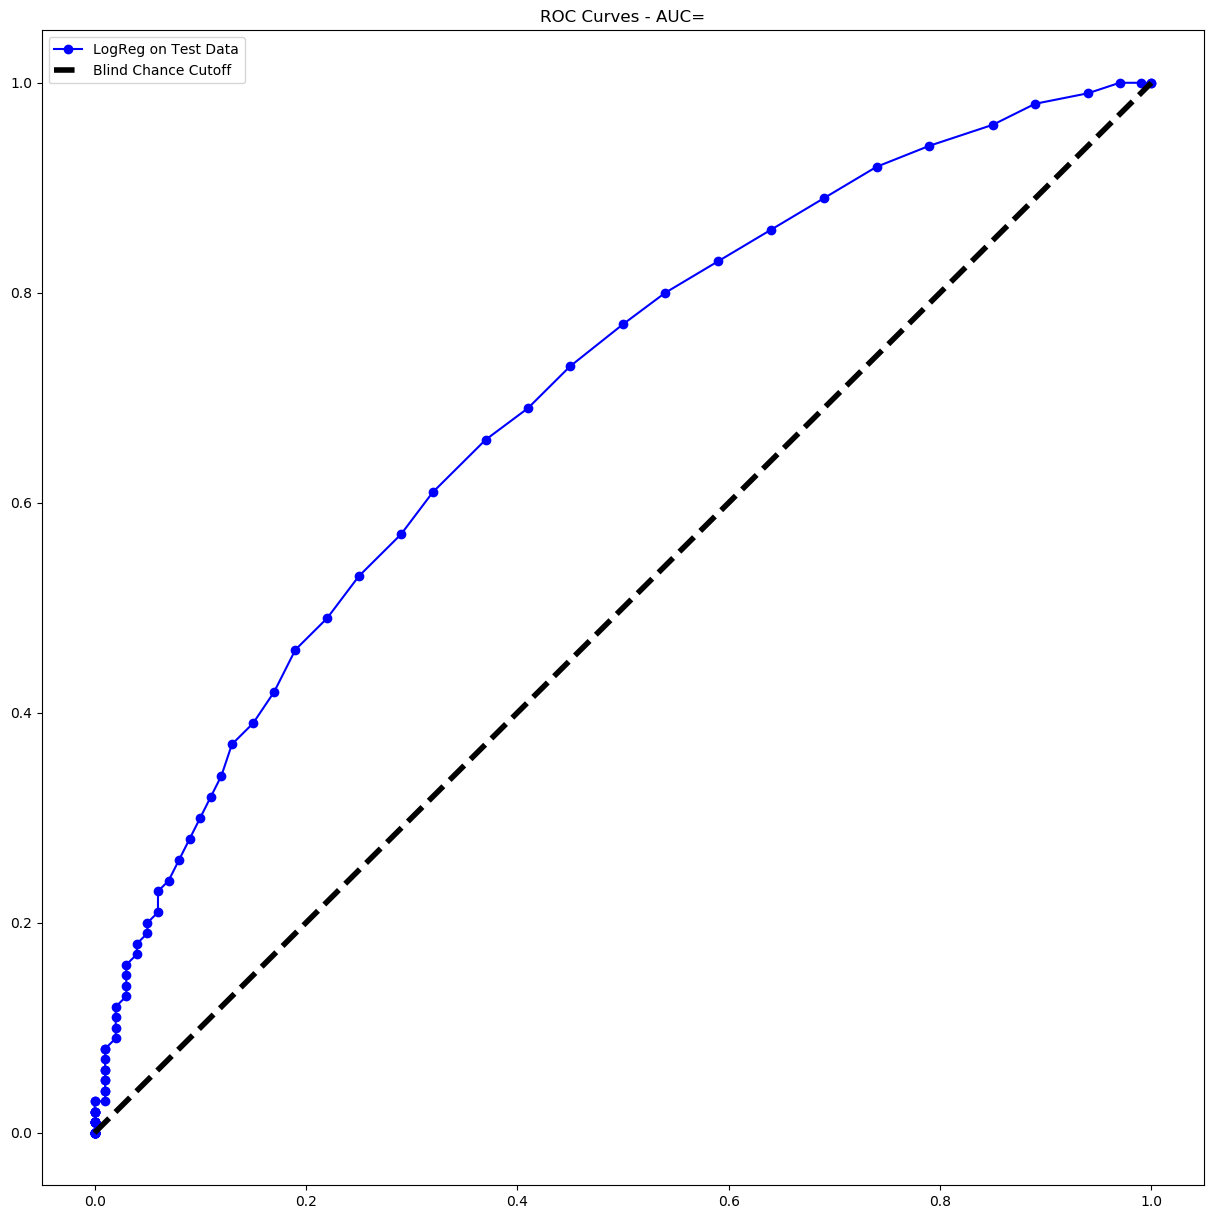

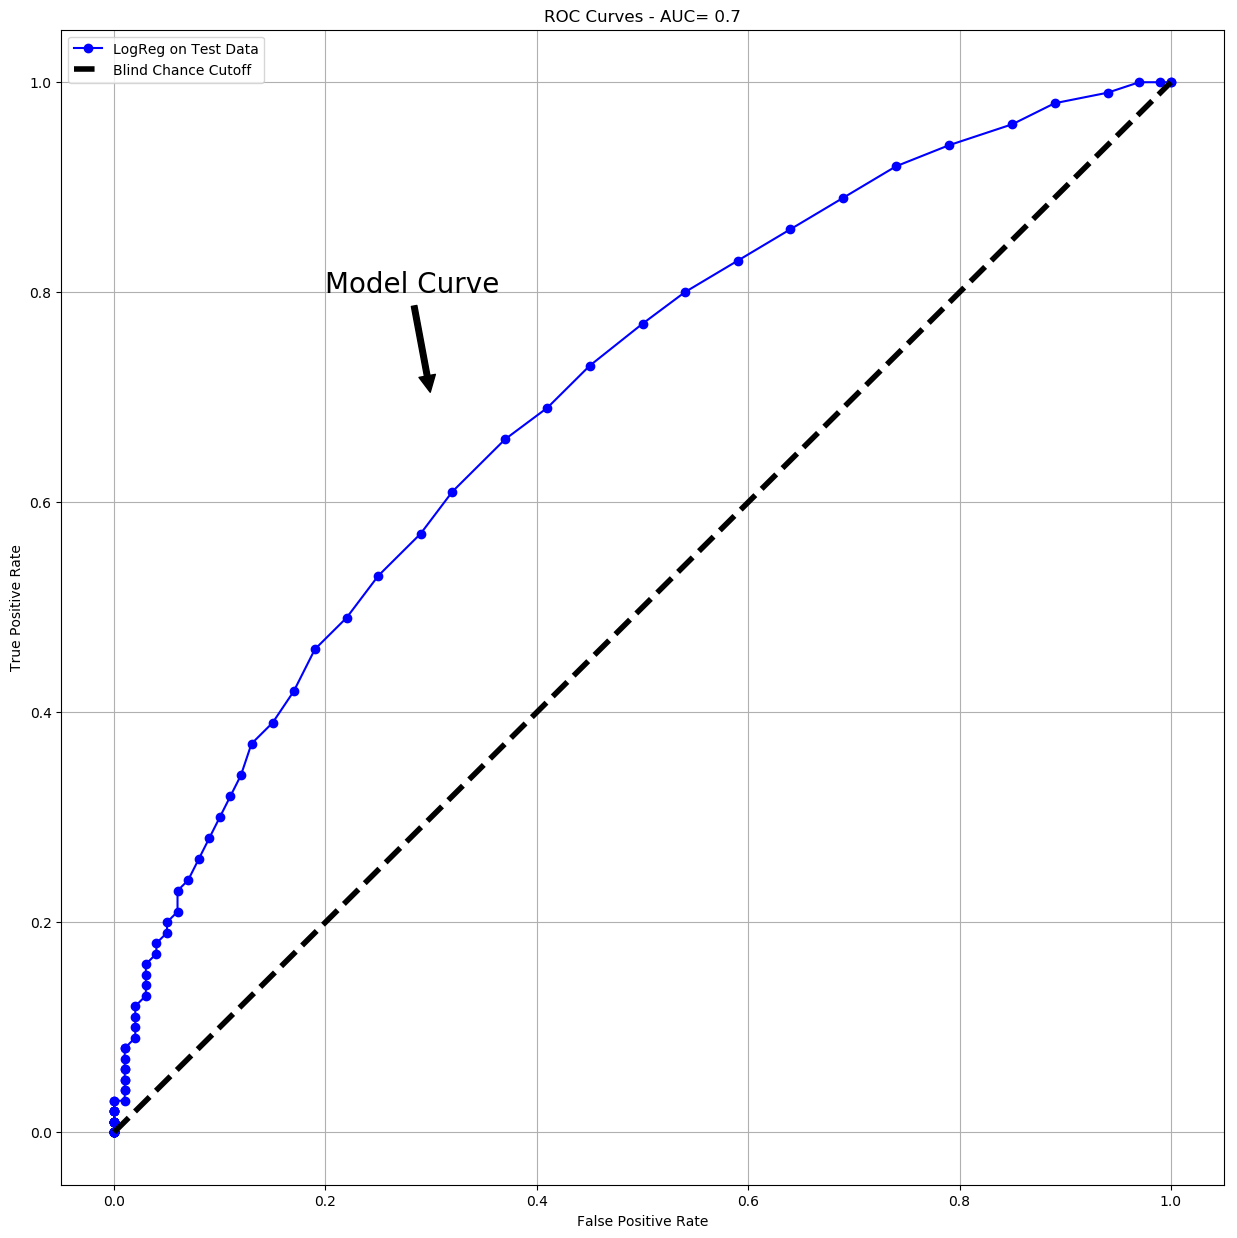

In [171]:
logreg_perforamnce = roc_curve(logreg,Y_test_norm,X_test_norm)

Regularization=0.01 Predicted      0    1
Det_1                
0          54373  337
1          10061  437
0.565


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


Regularization=0.1 Predicted      0    1
Det_1                
0          54309  401
1           9983  515
0.562
Regularization=1 Predicted      0    1
Det_1                
0          54286  424
1           9952  546
0.563
Regularization=10 Predicted      0    1
Det_1                
0          54279  431
1           9947  551
0.561
Regularization=100 Predicted      0    1
Det_1                
0          54279  431
1           9949  549
0.56


<Figure size 640x480 with 0 Axes>

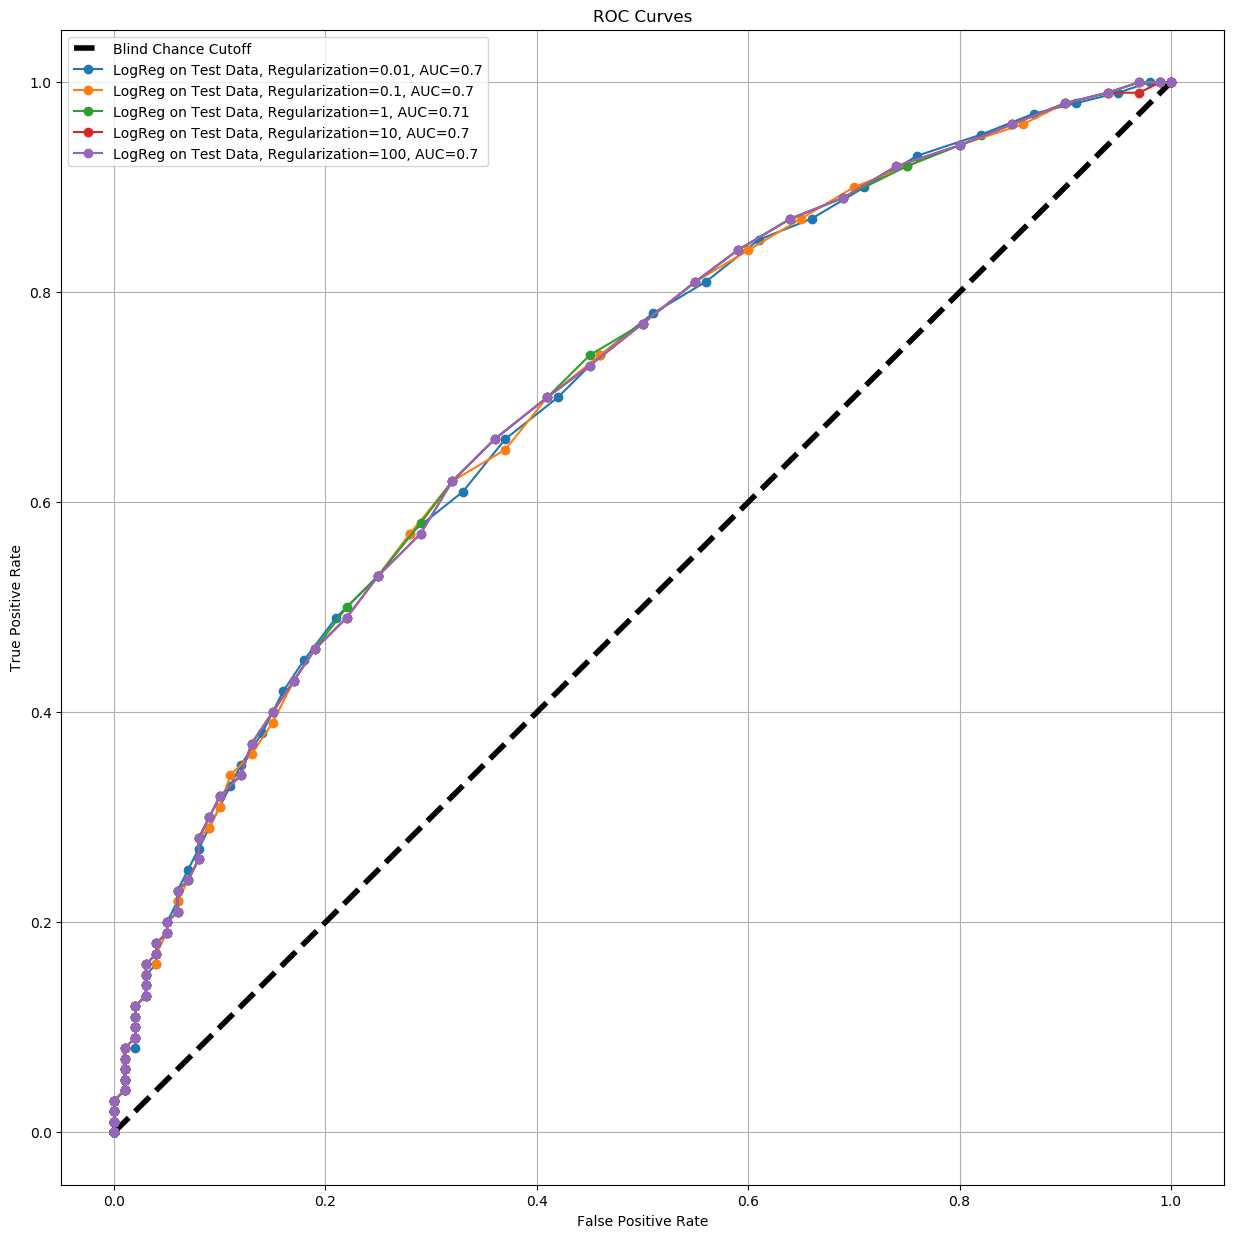

In [48]:
# 2. instantiate model
plt.gray()
fig, ax = plt.subplots(figsize=(15,15))
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
tpfpf = np.linspace(0,1,101)
ax.plot(tpfpf,tpfpf,'--',c='k',linewidth=4, label='Blind Chance Cutoff')

for c in [0.01, 0.1, 1, 10, 100]:
    logreg_c = LogisticRegression(C=c)
    # 3. fit 
    logreg_c.fit(X_train_original, Y_train_original)
    new_pred_class = logreg_c.predict(X_test_original)
    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)
    Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print('Regularization='+str(c), Log_MM_Output)
    thresholds = np.linspace(0,1,101)
    tpr = []
    fpr = []
    for f in thresholds:
        metrics = pr(logreg_c,Y_test_original,X_test_original,f)
        tpr.append(metrics[0])
        fpr.append(metrics[1])
        plt.rcdefaults()
    area = auc(fpr,tpr)
    ax.plot(fpr, tpr, 'o-', label='LogReg on Test Data, Regularization='+str(c)+', AUC='+str(round(area,2)))

ax.legend()
plt.show()

Average precision-recall score: 0.33
Area Under Curve =  0.32728361894021685


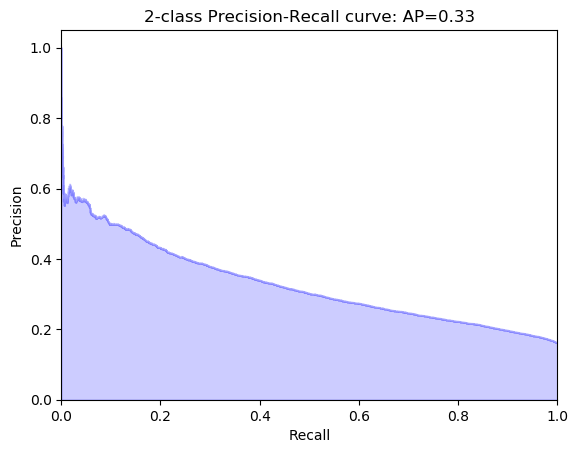

In [21]:
Y_score = logreg.predict_proba(X_test_original)[:,1]

average_precision = average_precision_score(Y_test_original, Y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(Y_test_original, Y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
print('Area Under Curve = ',auc(recall,precision))

## Switching Scalers from Log-MinMax to Log-Normal

In [205]:
y_norm = df_logNorm.Det_1
X_norm=df_logNorm.drop('Det_0',  axis=1)
X_norm=X_norm.drop('Det_1',  axis=1)
feature_cols=X_norm.columns

X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, 
                                                    y_norm,
                                                    stratify=y_norm, 
                                                    test_size=0.25)

print(feature_cols)
lognorm = LogisticRegression()
lognorm.fit(X_train_norm, Y_train_norm)

#optional class weight functionality - class_weight parameter achieves the same thing:
#prior = 0.15
#logreg.intercept_ += np.log(prior/(1-prior)) - np.log(prior/(1-prior))

new_pred_class = lognorm.predict(X_test_norm)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_norm).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)

Index(['EXOEnabledUsers', 'LicensedUsers', 'LYOEnabledUsers',
       'SPOEnabledUsers', 'OD4BEnabledUsers', 'ProPlusEnabledUsers',
       'TotalUsers', 'EDUSubscriptionsCount', 'ExchangeSubscriptionsCount',
       'LyncSubscriptionsCount',
       ...
       'O365TenantReleaseTrack_No_Data',
       'O365TenantReleaseTrack_StagedRollout', 'DefaultDataLocation_APC',
       'DefaultDataLocation_AUS', 'DefaultDataLocation_EUR',
       'DefaultDataLocation_GBR', 'DefaultDataLocation_IND',
       'DefaultDataLocation_JPN', 'DefaultDataLocation_NAM',
       'DefaultDataLocation_No_Data'],
      dtype='object', length=608)


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Predicted      0    1
Det_1                
0          67807  566
1          12436  700


In [206]:
pr(lognorm,Y_test_norm,X_test_norm,0.5, summary=True)

{'true_positive': 0.05,
 'false_positive': 0.01,
 'accuracy': 0.84,
 'precision': 0.55,
 'recall': 0.05,
 'classification_rate': 0.016,
 'f1': 0.09}

0.0 1.0 1.0 0.16 0.16 1.0 1.0 0.28
0.01 1.0 1.0 0.16 0.16 1.0 1.0 0.28
0.02 1.0 0.99 0.17 0.16 1.0 0.994 0.28
0.03 1.0 0.97 0.18 0.16 1.0 0.975 0.28
0.04 0.99 0.94 0.21 0.17 0.99 0.946 0.29
0.05 0.98 0.9 0.24 0.17 0.98 0.909 0.29
0.06 0.96 0.85 0.28 0.18 0.96 0.865 0.3
0.07 0.94 0.79 0.32 0.19 0.94 0.817 0.32
0.08 0.91 0.74 0.36 0.19 0.91 0.769 0.31
0.09 0.89 0.69 0.4 0.2 0.89 0.72 0.33
0.1 0.86 0.64 0.44 0.21 0.86 0.674 0.34
0.11 0.83 0.59 0.48 0.21 0.83 0.63 0.34
0.12 0.8 0.54 0.51 0.22 0.8 0.584 0.35
0.13 0.77 0.5 0.55 0.23 0.77 0.541 0.35
0.14 0.73 0.45 0.58 0.24 0.73 0.497 0.36
0.15 0.69 0.41 0.61 0.25 0.69 0.454 0.37
0.16 0.65 0.36 0.64 0.26 0.65 0.411 0.37
0.17 0.61 0.32 0.67 0.27 0.61 0.371 0.37
0.18 0.57 0.29 0.69 0.28 0.57 0.333 0.38
0.19 0.53 0.25 0.71 0.29 0.53 0.297 0.37
0.2 0.49 0.22 0.73 0.3 0.49 0.265 0.37
0.21 0.46 0.19 0.75 0.31 0.46 0.237 0.37
0.22 0.42 0.17 0.76 0.32 0.42 0.211 0.36
0.23 0.39 0.15 0.78 0.33 0.39 0.19 0.36
0.24 0.37 0.13 0.79 0.35 0.37 0.171 0.36
0.2

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.83 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.84 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.85 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.86 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.87 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.88 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.89 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.9 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.91 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.92 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.93 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.94 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.95 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.96 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.97 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.98 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.99 0.0 0.0 0.84 nan 0.0 0.0 nan
1.0 0.0 0.0 0.84 nan 0.0 0.0 nan
0.70105


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


<Figure size 640x480 with 0 Axes>

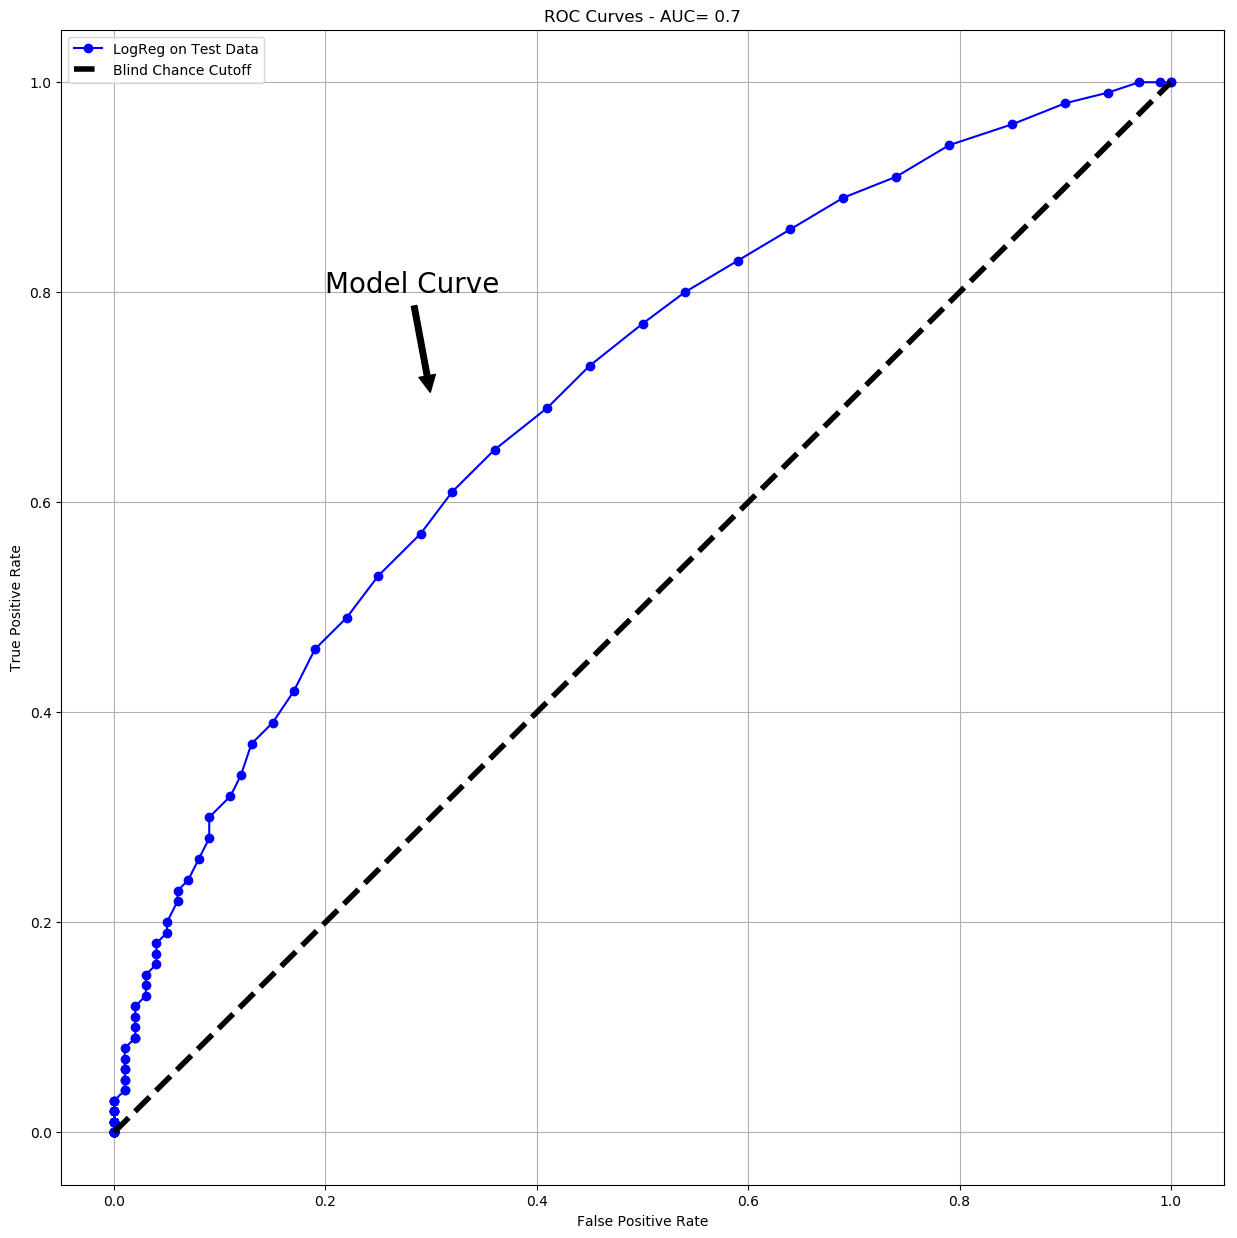

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ],
       [1.  , 1.  , 1.  , 1.  , 0.99, 0.98, 0.96, 0.94, 0.91, 0.89, 0.86,
        0.83, 0.8 , 0.77, 0.73, 0.69, 0.65, 0.61, 0.57, 0.53, 0.49, 0.46,
        0.42, 0.39, 0.37, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.23, 0.22,
        0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 ,
        0.09, 0.0

In [207]:
roc_curve(lognorm,Y_test_norm,X_test_norm)

## Logistic Regression Optimization

In [ ]:
df = df.sample(15000)

In [15]:
y = df.Det_1
X=df.drop('Det_0',  axis=1)
X=X.drop('Det_1',  axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

### SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
len(X_train),len(Y_train)

(244527, 244527)

In [ ]:
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(X_train,Y_train)

In [ ]:
os_smote_X = pd.DataFrame(data = os_smote_X,columns=X_train.columns)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=['Det_1'])

In [ ]:
logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit_smote.fit(os_smote_X, os_smote_Y)
new_pred_class = logit_smote.predict(X_test)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
pr(logit_smote,Y_test,X_test,0.5,summary=True)

In [9]:
logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit_smote.fit(os_smote_X, os_smote_Y)
new_pred_class = logit_smote.predict(X_test_original)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print('Precision: ',round(Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]),2))

Predicted      0      1
Det_1                  
0          35073  19637
1           3804   6694
Precision:  0.25


In [52]:
precision = 6694/(6694+19637)
recall = 6694/(6694+3804)
f1 = 2*(precision*recall/(precision+recall))
round(f1,2)

0.36

In [196]:
pr(logit_smote,Y_test_original,X_test_original,0.56,summary=True)

{'true_positive': 0.52,
 'false_positive': 0.27,
 'accuracy': 0.7,
 'precision': 0.27,
 'recall': 0.52,
 'classification_rate': 0.311,
 'f1': 0.36}

0.0 1.0 1.0 0.16 0.16 1.0 1.0 0.28
0.01 1.0 1.0 0.16 0.16 1.0 0.999 0.28
0.02 1.0 0.99 0.17 0.16 1.0 0.995 0.28
0.03 1.0 0.99 0.17 0.16 1.0 0.989 0.28
0.04 1.0 0.98 0.18 0.16 1.0 0.983 0.28
0.05 0.99 0.97 0.18 0.16 0.99 0.974 0.28
0.06 0.99 0.96 0.19 0.16 0.99 0.965 0.28
0.07 0.99 0.95 0.2 0.17 0.99 0.956 0.29
0.08 0.98 0.94 0.21 0.17 0.98 0.946 0.29
0.09 0.98 0.93 0.22 0.17 0.98 0.936 0.29
0.1 0.97 0.92 0.23 0.17 0.97 0.925 0.29
0.11 0.97 0.9 0.24 0.17 0.97 0.914 0.29
0.12 0.97 0.89 0.25 0.17 0.97 0.903 0.29
0.13 0.96 0.88 0.26 0.17 0.96 0.892 0.29
0.14 0.96 0.86 0.27 0.17 0.96 0.879 0.29
0.15 0.95 0.85 0.28 0.18 0.95 0.867 0.3
0.16 0.94 0.84 0.29 0.18 0.94 0.856 0.3
0.17 0.94 0.83 0.3 0.18 0.94 0.844 0.3
0.18 0.93 0.81 0.31 0.18 0.93 0.831 0.3
0.19 0.93 0.8 0.32 0.18 0.93 0.819 0.3
0.2 0.92 0.78 0.33 0.18 0.92 0.806 0.3
0.21 0.92 0.77 0.34 0.19 0.92 0.792 0.31
0.22 0.91 0.76 0.35 0.19 0.91 0.78 0.31
0.23 0.9 0.74 0.36 0.19 0.9 0.767 0.31
0.24 0.89 0.73 0.37 0.19 0.89 0.754 0.31
0.25 

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


0.98 0.0 0.0 0.84 0.0 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.99 0.0 0.0 0.84 nan 0.0 0.0 nan


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


1.0 0.0 0.0 0.84 nan 0.0 0.0 nan
0.6753


<Figure size 640x480 with 0 Axes>

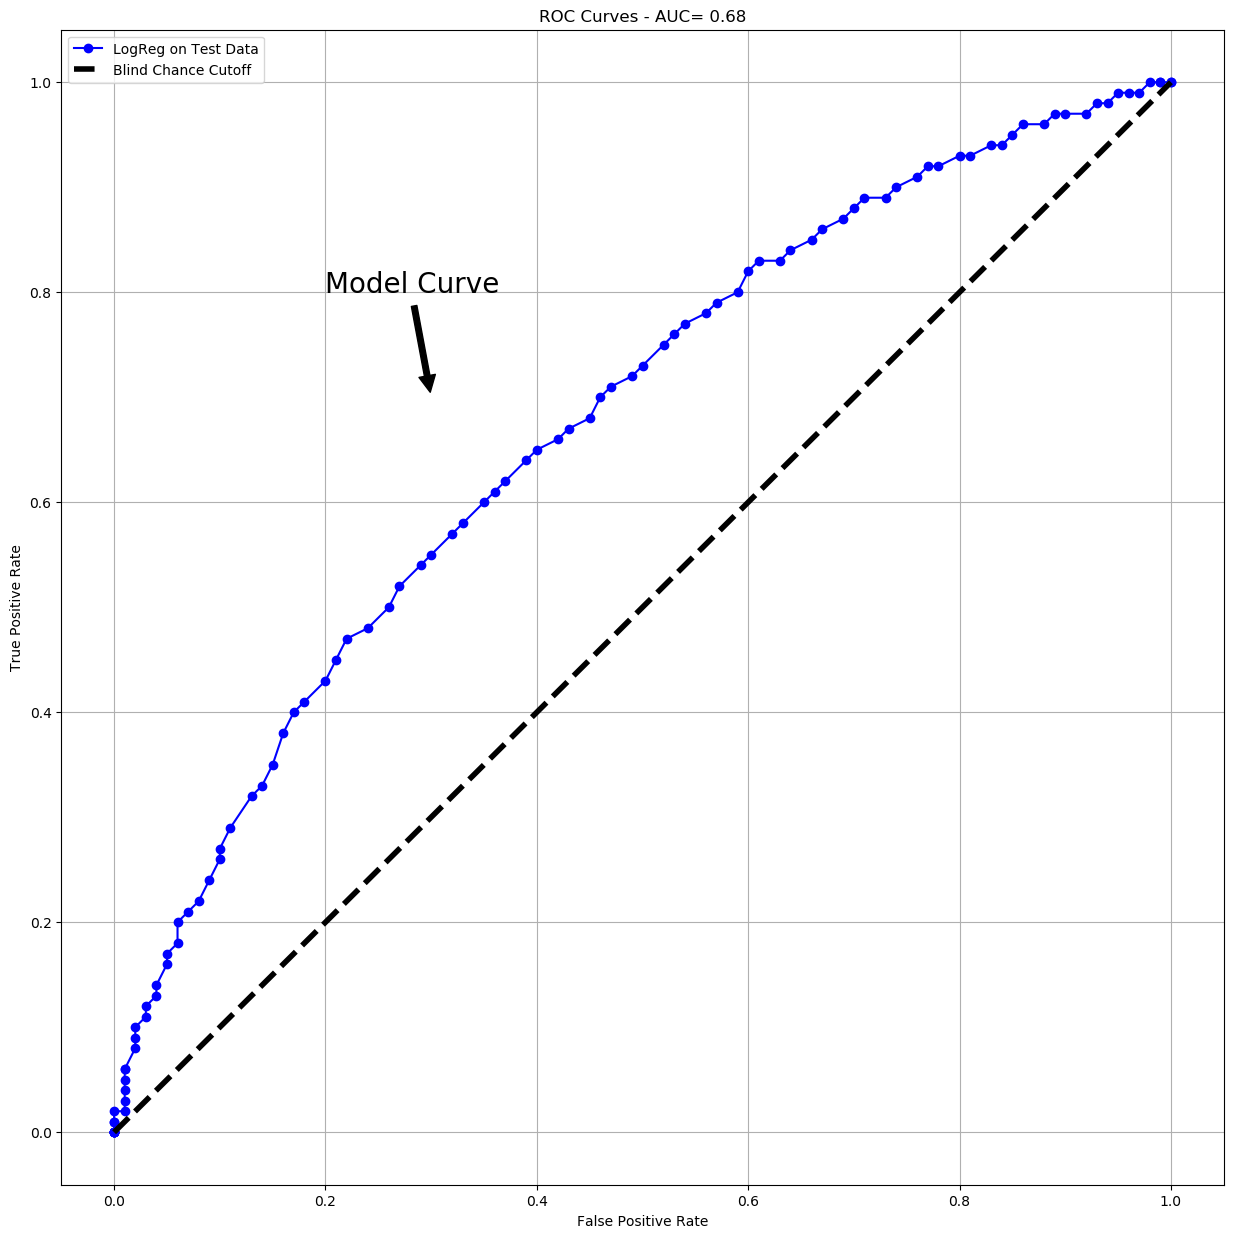

In [188]:
logreg_perforamnce = roc_curve(logit_smote,Y_test_original,X_test_original)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regularization=0.01 Predicted      0      1
Det_1                  
0          17013  10358
1           1880   3353
Average precision-recall score: 0.30


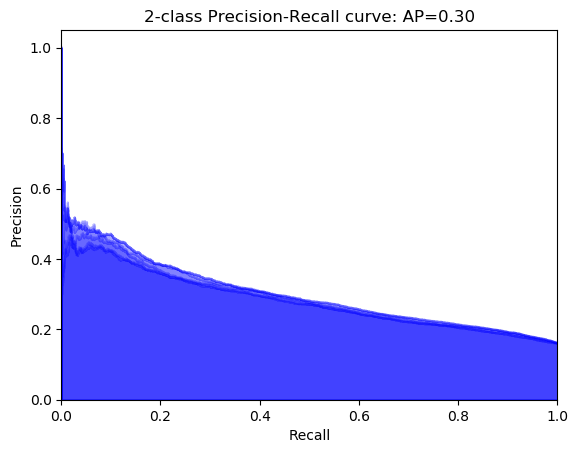

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regularization=0.1 Predicted      0     1
Det_1                 
0          17428  9943
1           1983  3250
Average precision-recall score: 0.30


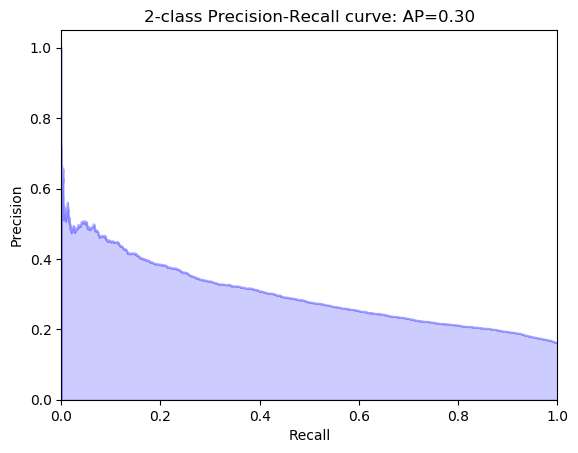

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regularization=1 Predicted      0     1
Det_1                 
0          17521  9850
1           2043  3190
Average precision-recall score: 0.29


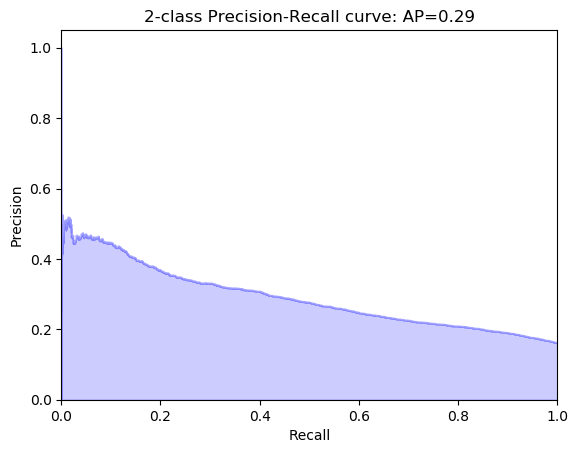

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regularization=10 Predicted      0     1
Det_1                 
0          17546  9825
1           2073  3160
Average precision-recall score: 0.28


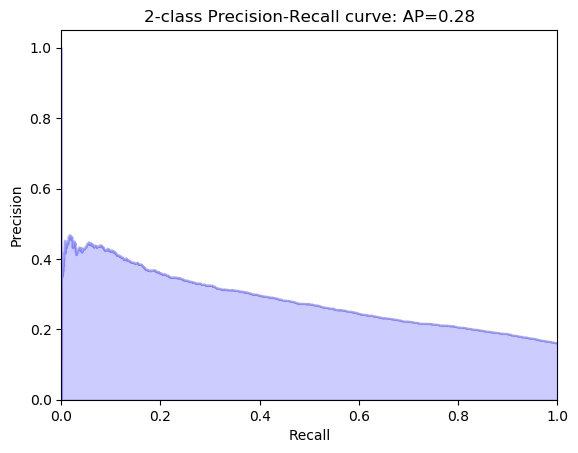

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regularization=100 Predicted      0     1
Det_1                 
0          17564  9807
1           2081  3152
Average precision-recall score: 0.28


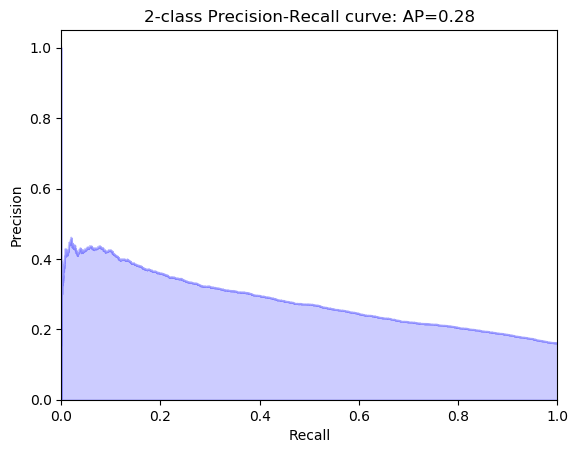

In [202]:
for c in [0.01, 0.1, 1, 10, 100]:
    log_smote_c = LogisticRegression(C=c)
    # 3. fit 
    log_smote_c.fit(os_smote_X, os_smote_Y)
    new_pred_class = log_smote_c.predict(X_test_original)
    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)
    Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print('Regularization='+str(c), Log_MM_Output)
    Y_score = log_smote_c.predict_proba(X_test_original)[:,1]
    average_precision = average_precision_score(Y_test_original, Y_score)

    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))

    precision, recall, _ = precision_recall_curve(Y_test_original, Y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

## Recursive Feature Elimination

In [52]:
logit = LogisticRegression(n_jobs = -1)

rfe = RFE(logit,5)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X_train.columns],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rfe_X = os_smote_X[cols]
train_rfe_Y = os_smote_Y


logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit_rfe.fit(train_rfe_X, train_rfe_Y)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
# Feature matrix reduced to these (5|10|25) variables:
idc_rfe[idc_rfe.rfe_support==True]

,rfe_support,columns,ranking
13,True,TotalSubscriptionCount,1
48,True,Exchange_Use_calendar_free_busy_and_contacts,1
49,True,Install_setup_and_use_Power_Bi,1
309,True,CommunicationLanguage_tr,1
312,True,CommunicationLanguage_zh-CHS,1


In [117]:
#idc_rfe.to_csv('rfe5_feature_rankings.csv',index=False)
idc_rfe = pd.read_csv('rfe10_feature_rankings.csv')

In [118]:
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
train_rfe_X = os_smote_X[cols]
rfe_columns = train_rfe_X.columns
test_rfe_X = X_test.loc[:,rfe_columns]

In [119]:
logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logit_rfe.fit(train_rfe_X, train_rfe_Y)
new_pred_class = logit_rfe.predict(test_rfe_X)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

Predicted     0     1
Det_1                
0          1072  1456
1           136   336
Precision:  0.19
Recall:  0.71
F1:  0.3
Classification Rate : 0.055


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [113]:
for i in range(1,5):
    cols = idc_rfe[idc_rfe["ranking"] <=i]["columns"].tolist()
    train_rfe_X = os_smote_X[cols]
    train_rfe_Y = os_smote_Y


    logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
              intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
              penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
              verbose=0, warm_start=False)

    logit_rfe.fit(train_rfe_X, train_rfe_Y)

    rfe_columns = train_rfe_X.columns
    test_rfe_X = X_test.loc[:,rfe_columns]

    new_pred_class = logit_rfe.predict(test_rfe_X)

    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)

    Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
    #pdf= Predoutput.pred.value_counts()
    #print(pdf)
    #Check=Log_MM_Output
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print(Log_MM_Output)
    precision_metrics(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted     0     1
Det_1                
0          1064  1464
1           133   339
Precision:  0.19
Recall:  0.72
F1:  0.3
Classification Rate : 0.055
Predicted     0     1
Det_1                
0          1070  1458
1           134   338
Precision:  0.19
Recall:  0.72
F1:  0.3
Classification Rate : 0.055
Predicted     0     1
Det_1                
0          1070  1458
1           134   338
Precision:  0.19
Recall:  0.72
F1:  0.3
Classification Rate : 0.055
Predicted     0     1
Det_1                
0          1070  1458
1           135   337
Precision:  0.19
Recall:  0.71
F1:  0.3
Classification Rate : 0.055


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
default = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
default.fit(X_train,Y_train)
print(f1_score(Y_train,default.predict(X_train)))
pr(default,Y_test,X_test,0.5,summary=True)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.10101991257892182


{'true_positive': 0.05,
 'false_positive': 0.01,
 'accuracy': 0.84,
 'precision': 0.48,
 'recall': 0.05,
 'classification_rate': 0.016,
 'f1': 0.09056603773584905}

# Model 2: Decision Tree

The purpose of building a single Decision Tree model is to develop a tree to highlight the features that detect the target class of Detractors. But, the default decision tree model below actually has one of the best recall scores for the detractor classification out of all the default models.

In [13]:
from sklearn import tree

In [92]:
# 2. instantiate model
groot = tree.DecisionTreeClassifier()

# 3. fit 
groot.fit(X_train_original, Y_train_original)
new_pred_class = groot.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
precision_metrics(Log_MM_Output)

Precision:  0.23
Recall:  0.25
F1:  0.24
Classification Rate : 0.174


In [93]:
print(Log_MM_Output)

Predicted      0     1
Det_1                 
0          22916  4353
1           3999  1336


In [ ]:
tree_smote = tree.DecisionTreeClassifier()
tree_smote.fit(os_smote_X, os_smote_Y)

In [189]:
new_pred_class = tree_smote.predict(X_test_original)
columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

Predicted      0     1
Det_1                 
0          22932  4439
1           3790  1443
Precision:  0.25
Recall:  0.28
F1:  0.26
Classification Rate : 0.18


In [190]:
pr(tree_smote,Y_test_original,X_test_original,0.5,summary=True)

{'true_positive': 0.28,
 'false_positive': 0.16,
 'accuracy': 0.75,
 'precision': 0.25,
 'recall': 0.28,
 'classification_rate': 0.18,
 'f1': 0.26}

0.0 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.01 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.02 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.03 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.04 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.05 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.06 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.07 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.08 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.09 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.1 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.11 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.12 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.13 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.14 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.15 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.16 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.17 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.18 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.19 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.2 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.21 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.22 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.23 0.28 0.17 0.75 0.25 0.28 0.185 0.26
0.24 0.28 0.17 0.75

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


<Figure size 640x480 with 0 Axes>

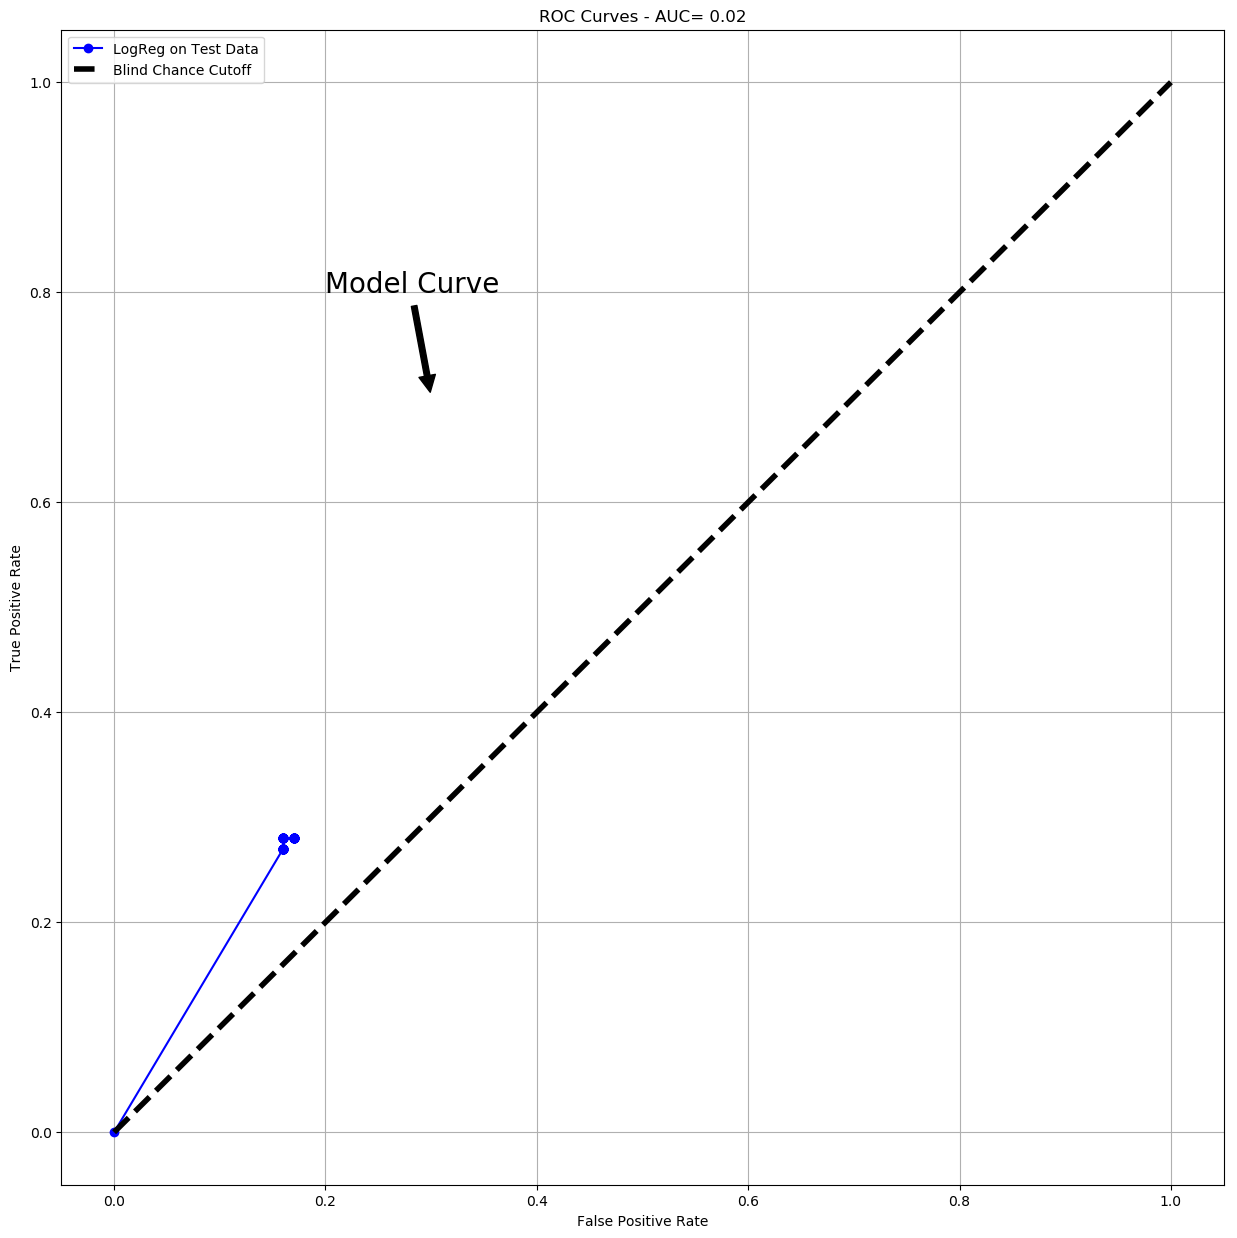

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ],
       [0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
        0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
        0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
        0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28,
        0.28, 0.2

In [191]:
roc_curve(tree_smote,Y_test_original,X_test_original)

## Export Tree Plot:

In [12]:
from graphviz import Source
from IPython.display import SVG

In [14]:
raw_df = pd.read_csv('data/New_RawDataWithDummys.csv')

In [ ]:
majority_class_samples = raw_df[raw_df.Det_1==0].sample(10000)
minority_class_samples = raw_df[raw_df.Det_1==1].sample(5000)
sub_df = pd.concat([majority_class_samples,minority_class_samples],ignore_index=True)
y = sub_df.Det_1
X=sub_df.drop('Det_0',  axis=1)
X=X.drop('Det_1',  axis=1)
feature_cols=X.columns

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [19]:
demo_tree = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

demo_tree.fit(X_train,Y_train)
new_pred_class = demo_tree.predict(X_test)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print(round(Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]),3))

Predicted     0    1
Det_1               
0          2361  139
1          1050  200
0.59


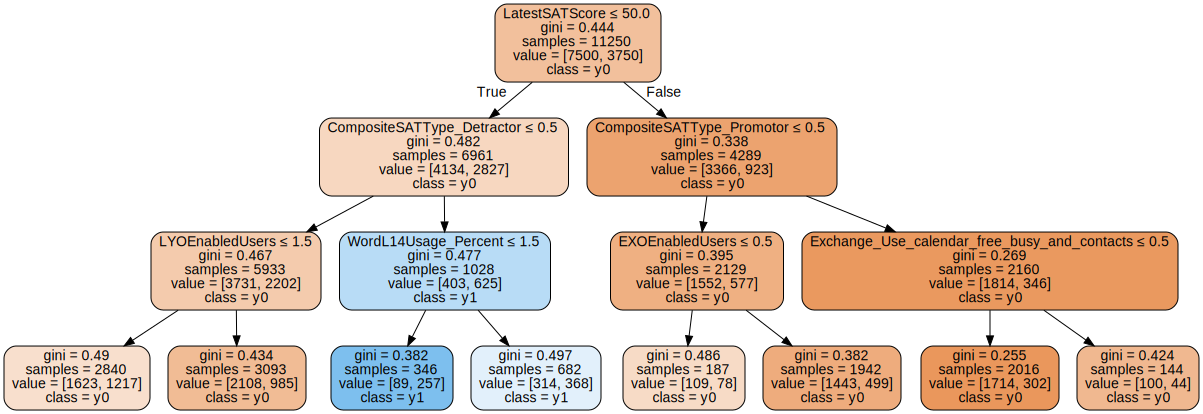

In [20]:
graph = Source(tree.export_graphviz(demo_tree,
                         class_names=True, #proportion=True,
                         feature_names=X_test.columns,
                         out_file='training_tree.dot',filled=True, rounded=True,  
                         special_characters=True)) 
Source.from_file('training_tree.dot')

## Decision Tree Evaluation

In [6]:
def pr(y,p,threshold):
    y_prob = groot.predict_proba(p)[:,1]
    y_pred = numpy.array(y_prob) > threshold
    y_true = numpy.array(y)
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    return tpr, fpr

In [18]:
optimal_tree.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [175]:
tree_performance = roc_curve(optimal_tree)

NameError: name 'optimal_tree' is not defined

# Model 3: Random Forest

The precision of this model is weaker than others in this notebook, so by process of elimination I did not focus on tuning this.

In [31]:
#df= pd.read_csv('data/')
y = df.Det_1
X=df.drop('Det_0',  axis=1)
X=X.drop('Det_1',  axis=1)
feature_cols=X.columns
print(feature_cols)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

Index(['EXOEnabledUsers', 'LicensedUsers', 'LYOEnabledUsers',
       'SPOEnabledUsers', 'OD4BEnabledUsers', 'ProPlusEnabledUsers',
       'TotalUsers', 'EDUSubscriptionsCount', 'ExchangeSubscriptionsCount',
       'LyncSubscriptionsCount',
       ...
       'O365TenantReleaseTrack_No_Data',
       'O365TenantReleaseTrack_StagedRollout', 'DefaultDataLocation_APC',
       'DefaultDataLocation_AUS', 'DefaultDataLocation_EUR',
       'DefaultDataLocation_GBR', 'DefaultDataLocation_IND',
       'DefaultDataLocation_JPN', 'DefaultDataLocation_NAM',
       'DefaultDataLocation_No_Data'],
      dtype='object', length=608)


In [12]:
# 2. instantiate model
rfc = RandomForestClassifier(n_jobs=-1)
param_grid = { 
    'n_estimators': [50, 100, 200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,5,10,None],
    'oob_score': [True,False]}

CV_rfc = GridSearchCV(estimator=rfc, n_jobs=-1, param_grid=param_grid, verbose=10, scoring='neg_log_loss',cv= 2)
CV_rfc.fit(X_train, Y_train)
print(CV_rfc.best_params_, CV_rfc.best_score_)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 57.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 92.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 15

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500, 'oob_score': True} -0.410171672112851


In [ ]:
rf = RandomForestClassifier(max_depth=10, n_estimators=500,oob_score=True,n_jobs=-1)

rf.fit(X_train_original,Y_train_original)
new_pred_class = rf.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print(round(Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]),3))

In [ ]:
for s in [1,5,10,50,100,200,500]: 
    rf_smote = RandomForestClassifier(max_features='log2',n_estimators=500,
                                      min_samples_leaf=s)
    rf_smote.fit(os_smote_X, os_smote_Y)
    new_pred_class = rf_smote.predict(X_test_original)
    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)

    Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
    #pdf= Predoutput.pred.value_counts()
    #print(pdf)
    #Check=Log_MM_Output
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print(Log_MM_Output)
    print(pr(rf_smote,Y_test_original,X_test_original,0.5,summary=True))

In [ ]:
#optimized for f1
for s in [1,5,10,50,100,200,500]: 
    rf_smote = RandomForestClassifier(max_features='log2',n_estimators=500,
                                      min_samples_leaf=s)
    rf_smote.fit(os_smote_X, os_smote_Y)
    new_pred_class = rf_smote.predict(X_test_original)
    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)

    Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
    #pdf= Predoutput.pred.value_counts()
    #print(pdf)
    #Check=Log_MM_Output
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print(Log_MM_Output)
    print(pr(rf_smote,Y_test_original,X_test_original,0.5,summary=True))

In [52]:
# 3. fit 
rf = RandomForestClassifier(n_estimators = 100,max_features = 'auto')
rf.fit(X_train_original, Y_train_original)
new_pred_class = rf.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)

Predicted      0    1
Det_1                
0          54058  652
1           9867  631


In [140]:
prec = 631/(652+631)
rec = 631/10498
print('F1 = ',round(2*(prec*rec/(rec+prec)),2))

F1 =  0.11


In [29]:
rfc = RandomForestClassifier(n_jobs=-1) 

param_grid = { 
    'n_estimators': [50, 100, 200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,6,10,None],
    'oob_score': [True,False],
    'criterion': ['gini','entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring,
                      verbose=5,n_jobs=-1,cv= 2, refit=False)
CV_rfc.fit(os_smote_X, os_smote_Y)

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

In [ ]:
CV_rfc.cv_results_

In [214]:
print(CV_rfc.best_params_, CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500, 'oob_score': True} 0.922871551468407


In [216]:
sample_leaf_options = [1,5,10,50,100,200,500]
#min_samples_leaf parameter had to be tuned separately
#100 is optimal

In [220]:
for s in sample_leaf_options: 
    rf_smote = RandomForestClassifier(max_features='log2',n_estimators=500,
                                      min_samples_leaf=s)
    rf_smote.fit(os_smote_X, os_smote_Y)
    new_pred_class = rf_smote.predict(X_test_original)
    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)

    Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
    #pdf= Predoutput.pred.value_counts()
    #print(pdf)
    #Check=Log_MM_Output
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print(Log_MM_Output)
    print(pr(rf_smote,Y_test_original,X_test_original,0.5,summary=True))

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0    1
Det_1                
0          26933  438
1           4737  496
{'true_positive': 0.09, 'false_positive': 0.02, 'accuracy': 0.84, 'precision': 0.53, 'recall': 0.09, 'classification_rate': 0.029, 'f1': 0.15}


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0     1
Det_1                 
0          25673  1698
1           4266   967
{'true_positive': 0.18, 'false_positive': 0.06, 'accuracy': 0.82, 'precision': 0.36, 'recall': 0.18, 'classification_rate': 0.082, 'f1': 0.24}


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0     1
Det_1                 
0          25189  2182
1           4091  1142
{'true_positive': 0.22, 'false_positive': 0.08, 'accuracy': 0.81, 'precision': 0.34, 'recall': 0.22, 'classification_rate': 0.102, 'f1': 0.27}


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0     1
Det_1                 
0          23364  4007
1           3500  1733
{'true_positive': 0.33, 'false_positive': 0.15, 'accuracy': 0.77, 'precision': 0.3, 'recall': 0.33, 'classification_rate': 0.176, 'f1': 0.31}


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0     1
Det_1                 
0          22459  4912
1           3231  2002
{'true_positive': 0.38, 'false_positive': 0.18, 'accuracy': 0.75, 'precision': 0.29, 'recall': 0.38, 'classification_rate': 0.212, 'f1': 0.33}


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0     1
Det_1                 
0          21261  6110
1           2959  2274
{'true_positive': 0.43, 'false_positive': 0.22, 'accuracy': 0.72, 'precision': 0.27, 'recall': 0.43, 'classification_rate': 0.257, 'f1': 0.33}


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Predicted      0     1
Det_1                 
0          19898  7473
1           2726  2507
{'true_positive': 0.48, 'false_positive': 0.27, 'accuracy': 0.69, 'precision': 0.25, 'recall': 0.48, 'classification_rate': 0.306, 'f1': 0.33}


In [21]:
learners = rf.feature_importances_.argsort()[::-1]

In [29]:
pd.DataFrame(df.columns[learners], rf.feature_importances_[learners])

,0
0.031159,AssignedPlanCount
0.026849,TotalUsers
0.022752,LatestSATType_Passive
0.017155,FirstTicketAge
0.016854,SubscriptionCount
0.016375,DaysTicketOpenAfterSubStart
0.016320,DaysToSubEndDate
0.015342,CommerceTenantTagsCount
0.014599,DomainCount
0.014548,LicensedUsers


In [28]:
list(df.columns[learners])

['AssignedPlanCount',
 'TotalUsers',
 'LatestSATType_Passive',
 'FirstTicketAge',
 'SubscriptionCount',
 'DaysTicketOpenAfterSubStart',
 'DaysToSubEndDate',
 'CommerceTenantTagsCount',
 'DomainCount',
 'LicensedUsers',
 'EXOEnabledUsers',
 'L28TotalUsage',
 'ExcelL28Usage_Percent',
 'WordL28Usage_Percent',
 'WordL28Usage',
 'ExcelL28Usage',
 'OutlookL28Usage_Percent',
 'MaxCloseTime',
 'Win10L28Usage',
 'SPOEnabledUsers',
 'TotalGroupCount',
 'OD4BEnabledUsers',
 'TotalTickets',
 'PowerPointL28Usage_Percent',
 'OutlookL28Usage',
 'L14TotalUsage',
 'LYOEnabledUsers',
 'Win10L28Usage_Percent',
 'ExcelL14Usage_Percent',
 'WordL14Usage',
 'ExcelL14Usage',
 'WinOtherL28Usage_Percent',
 'ProPlusEnabledUsers',
 'WordL14Usage_Percent',
 'PowerPointL28Usage',
 'Win10L14Usage',
 'TotalSubscriptionCount',
 'PaidSubscriptionCount',
 'WinOtherL28Usage',
 'MedCloseTime',
 'OutlookL14Usage',
 'OutlookL14Usage_Percent',
 'Win10L14Usage_Percent',
 'PowerPointL14Usage_Percent',
 'OneNoteL28Usage_Percent

## Random Forest Evaluation

0.0 0.985 0.96 0.43 0.42 0.969
0.01 0.985 0.96 0.43 0.42 0.969
0.02 0.985 0.96 0.43 0.42 0.969
0.03 0.985 0.96 0.43 0.42 0.969
0.04 0.985 0.96 0.43 0.42 0.969
0.05 0.985 0.96 0.43 0.42 0.969
0.06 0.983 0.96 0.43 0.42 0.968
0.07 0.983 0.96 0.43 0.42 0.968
0.08 0.983 0.96 0.43 0.42 0.968
0.09 0.983 0.96 0.43 0.42 0.968
0.1 0.966 0.86 0.48 0.44 0.903
0.11 0.966 0.86 0.48 0.44 0.903
0.12 0.966 0.86 0.48 0.44 0.903
0.13 0.966 0.86 0.48 0.44 0.903
0.14 0.966 0.86 0.48 0.44 0.903
0.15 0.966 0.86 0.48 0.44 0.903
0.16 0.966 0.86 0.48 0.44 0.903
0.17 0.966 0.86 0.48 0.44 0.903
0.18 0.966 0.86 0.48 0.44 0.903
0.19 0.966 0.86 0.48 0.44 0.903
0.2 0.852 0.68 0.54 0.47 0.751
0.21 0.852 0.68 0.54 0.47 0.751
0.22 0.852 0.68 0.54 0.47 0.751
0.23 0.852 0.68 0.54 0.47 0.751
0.24 0.852 0.68 0.54 0.47 0.751
0.25 0.852 0.68 0.54 0.47 0.751
0.26 0.852 0.68 0.54 0.47 0.751
0.27 0.852 0.68 0.54 0.47 0.751
0.28 0.852 0.68 0.54 0.47 0.751
0.29 0.852 0.68 0.54 0.47 0.751
0.3 0.727 0.51 0.58 0.5 0.602
0.31 0.727 0.

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


<Figure size 640x480 with 0 Axes>

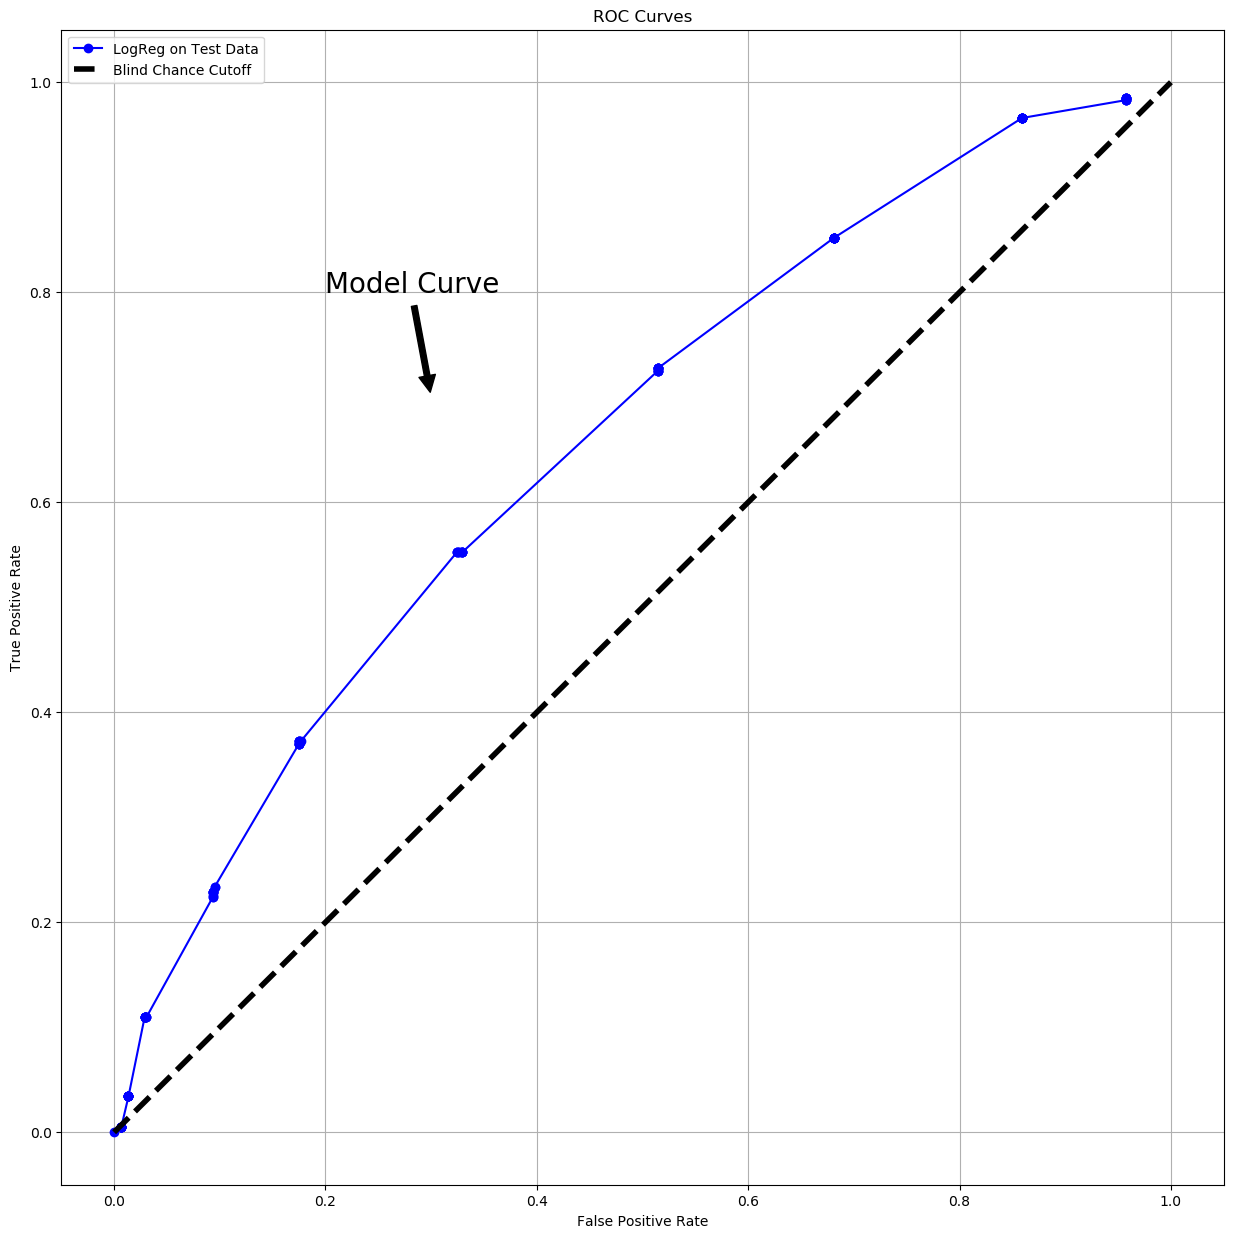

In [121]:
rf_performance = roc_curve(rf)

In [192]:
rf_smote_performance = roc_curve(rf_smote,Y_train_original,X_train_original)

MemoryError: 

In [ ]:
extra = ExtraTreesClassifier()
extra.fit(X_train_original, Y_train_original)
new_pred_class = extra.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)

In [227]:
print(Log_MM_Output)
pr(extra,Y_test_original,X_test_original,0.5,summary=True)

Predicted      0    1
Det_1                
0          26750  621
1           4792  441


{'true_positive': 0.08,
 'false_positive': 0.02,
 'accuracy': 0.83,
 'precision': 0.42,
 'recall': 0.08,
 'classification_rate': 0.033,
 'f1': 0.13}

# Model 4: Grandient Boosting

In [15]:
gradient_test = xgb.XGBClassifier(n_jobs=-1, random_state=0)

gradient_test.fit(X_train_original,Y_train_original)
new_pred_class = gradient_test.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

Predicted      0    1
Det_1                
0          27163  186
1           4974  281
Precision:  0.6
Recall:  0.05
F1:  0.1
Classification Rate : 0.014


In [141]:
gradient_test_smote = xgb.XGBClassifier(n_jobs=-1)

gradient_test_smote.fit(os_smote_X, os_smote_Y)
new_pred_class = gradient_test_smote.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted      0    1
Det_1                
0          26633  636
1           4797  538
Precision:  0.46
Recall:  0.1
F1:  0.17
Classification Rate : 0.036


## Optimizing Parameters

647

In [ ]:
#Parameters such as Learning Rate and Minimum Child Weight were also optimized using this cell.
param_test1 = {
'learning_rate': [0.001,0.01,0.1],
'colsample_bytree': [0.6,0.8],
'max_depth': [2,4,6,8,10,None],
'subsample': [0.5,0.75],
'min_child_weight': [1,3,5,7],
'gamma': [0,1]}
cv = StratifiedShuffleSplit(n_splits=4, test_size=0.1)
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(n_jobs = 4, random_state=0), 
                        param_grid=param_test1, verbose=10,scoring='neg_log_loss', n_jobs=4,cv=cv)
gsearch1.fit(X_train,Y_train)
print(gsearch1.cv_results)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [64]:
gsearch1.grid_scores_[0]

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.00000, std: 0.00000, params: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.5}

In [59]:
gs = gsearch1.grid_scores_

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [67]:
with open("GridSearch2.txt", "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in gs:
        writer.writerow([val]) 

In [ ]:
param_grid = {
'learning_rate': [0.001,0.01,0.1],
'max_depth': [2,6,10],
'min_child_weight': [1,5,10,20]}
#alpha and lambda for regularization?

CV_xgb_smote = GridSearchCV(estimator=xgb.XGBClassifier(n_jobs = 2, random_state =0,
                                        subsample=0.5, colsample_bytree=0.6), 
                            param_grid=param_grid, scoring='neg_log_loss',
                      verbose=5,n_jobs=2,cv= 2)
CV_xgb_smote.fit(X_train, Y_train)
results = CV_xgb_smote.cv_results_
print(results)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 18.6min


In [ ]:
# 3. fit 
y = sub_df.Det_1
X=sub_df.drop('Det_0',  axis=1)
X=X.drop('Det_1',  axis=1)
feature_cols=X.columns
print(feature_cols)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [126]:
gradient_boost = xgb.XGBClassifier(learning_rate=0.01, gamma=1, n_jobs=4,
                                   max_depth=10, min_child_weight=7,
                                  colsample_bytree=0.6, subsample=0.5)

In [127]:

gradient_boost.fit(X_train,Y_train)
new_pred_class = gradient_boost.predict(X_test)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print('Precision: ',Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]))
print('Classification Rate :',round(Log_MM_Output.iloc[:,1].sum()/len(Y_test),3))

Predicted     0   1
Det_1              
0          2517  11
1           460  12
Precision:  0.5217391304347826
Classification Rate : 0.008


## Gradient Boosting Evaluation

The default XGB Classifier was a slight improvement in Precision over Logistic Regression Model. 

With parameter tuning, parameters such as max_depth and min_child_weight have been set to values that reduce model bias. This brings our Precision from ~63% to up to 80%, and our classification rate from 1% to 10%. Because of the random sampling in the model training, however, the results may vary - the precision will not always be as high as 80%. And the Logistic model still has the upper hand in terms of classification rate, identifying over twice as many detractors as the tuned XGB model. 

The parameters were optimized with the 50% probability cutoff. Because of this, the ROC curve will look different as this model is more sensitive to changes in the probability cutoff parameter. 

0.0 1.0 1.0 0.15 0.15 1.0
0.01 1.0 1.0 0.15 0.15 1.0
0.02 1.0 1.0 0.15 0.15 1.0
0.03 1.0 1.0 0.15 0.15 1.0
0.04 1.0 1.0 0.15 0.15 1.0
0.05 1.0 1.0 0.15 0.15 1.0
0.06 1.0 1.0 0.15 0.15 1.0
0.07 1.0 1.0 0.15 0.15 1.0
0.08 1.0 1.0 0.15 0.15 1.0
0.09 1.0 1.0 0.15 0.15 1.0
0.1 1.0 1.0 0.15 0.15 1.0
0.11 1.0 1.0 0.15 0.15 1.0
0.12 1.0 1.0 0.15 0.15 1.0
0.13 1.0 1.0 0.15 0.15 1.0
0.14 1.0 1.0 0.15 0.15 1.0
0.15 1.0 1.0 0.15 0.15 1.0
0.16 1.0 1.0 0.15 0.15 1.0
0.17 1.0 1.0 0.15 0.15 1.0
0.18 1.0 1.0 0.15 0.15 1.0
0.19 1.0 1.0 0.15 0.15 1.0
0.2 1.0 1.0 0.15 0.15 1.0
0.21 1.0 0.99 0.16 0.15 0.991
0.22 0.93 0.88 0.24 0.16 0.89
0.23 0.91 0.8 0.3 0.17 0.82
0.24 0.88 0.73 0.36 0.18 0.75
0.25 0.85 0.66 0.42 0.19 0.69
0.26 0.8 0.59 0.47 0.2 0.618
0.27 0.75 0.51 0.53 0.21 0.548
0.28 0.7 0.43 0.59 0.23 0.468
0.29 0.65 0.35 0.65 0.25 0.393
0.3 0.59 0.28 0.7 0.28 0.327
0.31 0.53 0.22 0.74 0.3 0.271
0.32 0.46 0.17 0.77 0.32 0.217
0.33 0.38 0.14 0.79 0.34 0.173
0.34 0.27 0.1 0.8 0.33 0.126
0.35 0.26 0.08 0.

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.63 0.0 0.0 0.85 nan 0.0
0.64 0.0 0.0 0.85 nan 0.0
0.65 0.0 0.0 0.85 nan 0.0
0.66 0.0 0.0 0.85 nan 0.0
0.67 0.0 0.0 0.85 nan 0.0
0.68 0.0 0.0 0.85 nan 0.0
0.69 0.0 0.0 0.85 nan 0.0
0.7 0.0 0.0 0.85 nan 0.0
0.71 0.0 0.0 0.85 nan 0.0
0.72 0.0 0.0 0.85 nan 0.0
0.73 0.0 0.0 0.85 nan 0.0
0.74 0.0 0.0 0.85 nan 0.0
0.75 0.0 0.0 0.85 nan 0.0
0.76 0.0 0.0 0.85 nan 0.0
0.77 0.0 0.0 0.85 nan 0.0
0.78 0.0 0.0 0.85 nan 0.0
0.79 0.0 0.0 0.85 nan 0.0
0.8 0.0 0.0 0.85 nan 0.0
0.81 0.0 0.0 0.85 nan 0.0
0.82 0.0 0.0 0.85 nan 0.0
0.83 0.0 0.0 0.85 nan 0.0
0.84 0.0 0.0 0.85 nan 0.0
0.85 0.0 0.0 0.85 nan 0.0
0.86 0.0 0.0 0.85 nan 0.0
0.87 0.0 0.0 0.85 nan 0.0
0.88 0.0 0.0 0.85 nan 0.0
0.89 0.0 0.0 0.85 nan 0.0
0.9 0.0 0.0 0.85 nan 0.0
0.91 0.0 0.0 0.85 nan 0.0
0.92 0.0 0.0 0.85 nan 0.0
0.93 0.0 0.0 0.85 nan 0.0
0.94 0.0 0.0 0.85 nan 0.0
0.95 0.0 0.0 0.85 nan 0.0
0.96 0.0 0.0 0.85 nan 0.0
0.97 0.0 0.0 0.85 nan 0.0
0.98 0.0 0.0 0.85 nan 0.0
0.99 0.0 0.0 0.85 nan 0.0
1.0 0.0 0.0 0.85 nan 0.0


<Figure size 640x480 with 0 Axes>

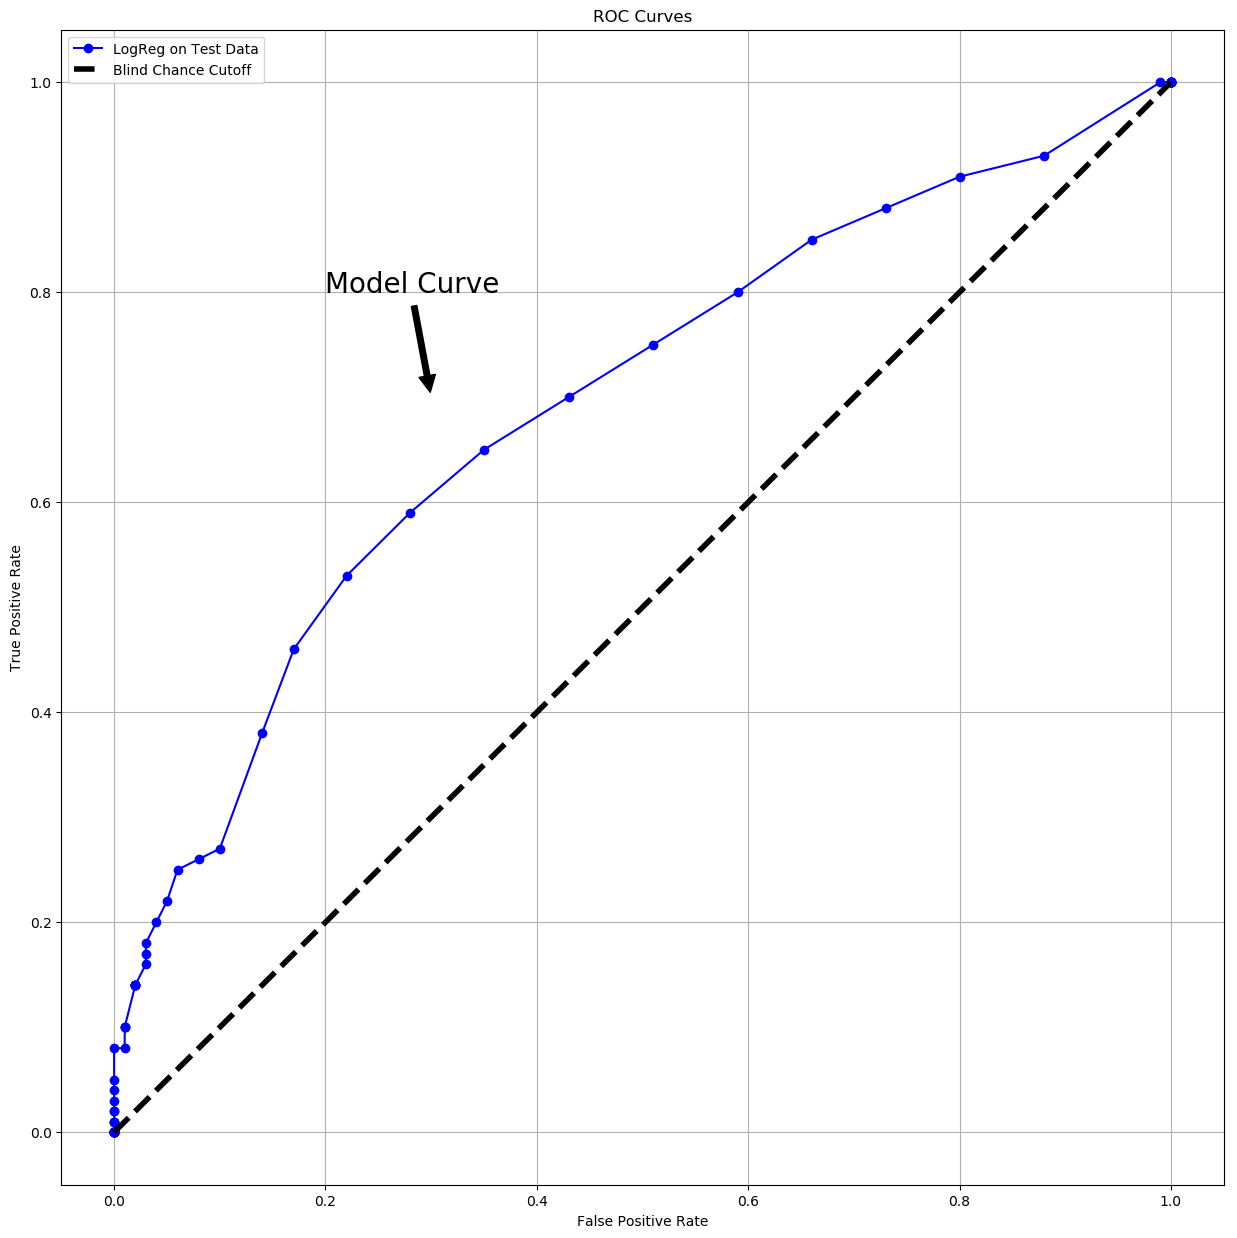

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        0.93, 0.91, 0.88, 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.59, 0.53, 0.46,
        0.38, 0.27, 0.26, 0.25, 0.22, 0.2 , 0.18, 0.17, 0.16, 0.14, 0.14,
        0.14, 0.1

In [76]:
_ = roc_curve(gradient_boost)

In [50]:
gradient_boost.fit(X_train_original,Y_train_original)
new_pred_class = gradient_boost.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print('Precision: ',Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]))
print('Classification Rate :',round(Log_MM_Output.iloc[:,1].sum()/len(Y_test_original),3))

Predicted      0    1
Det_1                
0          54333  377
1           9940  558
Precision:  0.5967914438502674
Classification Rate : 0.014


In [142]:
gradient_boost_smote = xgb.XGBClassifier(learning_rate=0.01, gamma=1,
                                   max_depth=10, min_child_weight=7,
                                  colsample_bytree=0.6, subsample=0.5)
gradient_boost_smote.fit(os_smote_X, os_smote_Y)
new_pred_class = gradient_boost_smote.predict(X_test_original)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted      0    1
Det_1                
0          26392  877
1           4641  694
Precision:  0.44
Recall:  0.13
F1:  0.2
Classification Rate : 0.048


0.0 1.0 1.0 0.14 0.14 1.0
0.01 1.0 1.0 0.14 0.14 1.0
0.02 1.0 1.0 0.14 0.14 1.0
0.03 1.0 1.0 0.14 0.14 1.0
0.04 1.0 1.0 0.14 0.14 1.0
0.05 1.0 1.0 0.14 0.14 1.0
0.06 1.0 1.0 0.14 0.14 1.0
0.07 1.0 1.0 0.14 0.14 1.0
0.08 1.0 1.0 0.14 0.14 1.0
0.09 1.0 1.0 0.14 0.14 1.0
0.1 1.0 1.0 0.14 0.14 1.0
0.11 1.0 1.0 0.14 0.14 1.0
0.12 1.0 1.0 0.14 0.14 1.0
0.13 1.0 1.0 0.14 0.14 1.0
0.14 1.0 1.0 0.14 0.14 1.0
0.15 1.0 1.0 0.14 0.14 1.0
0.16 1.0 1.0 0.14 0.14 1.0
0.17 1.0 1.0 0.14 0.14 1.0
0.18 1.0 1.0 0.14 0.14 1.0
0.19 1.0 1.0 0.14 0.14 1.0
0.2 1.0 1.0 0.14 0.14 1.0
0.21 1.0 0.97 0.16 0.14 0.978
0.22 0.98 0.92 0.2 0.15 0.93
0.23 0.94 0.82 0.29 0.16 0.839
0.24 0.94 0.77 0.33 0.17 0.793
0.25 0.91 0.72 0.37 0.17 0.743
0.26 0.85 0.63 0.44 0.18 0.662
0.27 0.76 0.52 0.52 0.19 0.558
0.28 0.69 0.41 0.6 0.22 0.453
0.29 0.57 0.3 0.68 0.24 0.338
0.3 0.5 0.23 0.73 0.26 0.268
0.31 0.47 0.18 0.77 0.3 0.222
0.32 0.4 0.15 0.79 0.31 0.181
0.33 0.33 0.11 0.81 0.33 0.141
0.34 0.3 0.09 0.83 0.36 0.116
0.35 0.26 0.

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  if __name__ == '__main__':


0.57 0.0 0.0 0.86 nan 0.0
0.58 0.0 0.0 0.86 nan 0.0
0.59 0.0 0.0 0.86 nan 0.0
0.6 0.0 0.0 0.86 nan 0.0
0.61 0.0 0.0 0.86 nan 0.0
0.62 0.0 0.0 0.86 nan 0.0
0.63 0.0 0.0 0.86 nan 0.0
0.64 0.0 0.0 0.86 nan 0.0
0.65 0.0 0.0 0.86 nan 0.0
0.66 0.0 0.0 0.86 nan 0.0
0.67 0.0 0.0 0.86 nan 0.0
0.68 0.0 0.0 0.86 nan 0.0
0.69 0.0 0.0 0.86 nan 0.0
0.7 0.0 0.0 0.86 nan 0.0
0.71 0.0 0.0 0.86 nan 0.0
0.72 0.0 0.0 0.86 nan 0.0
0.73 0.0 0.0 0.86 nan 0.0
0.74 0.0 0.0 0.86 nan 0.0
0.75 0.0 0.0 0.86 nan 0.0
0.76 0.0 0.0 0.86 nan 0.0
0.77 0.0 0.0 0.86 nan 0.0
0.78 0.0 0.0 0.86 nan 0.0
0.79 0.0 0.0 0.86 nan 0.0
0.8 0.0 0.0 0.86 nan 0.0
0.81 0.0 0.0 0.86 nan 0.0
0.82 0.0 0.0 0.86 nan 0.0
0.83 0.0 0.0 0.86 nan 0.0
0.84 0.0 0.0 0.86 nan 0.0
0.85 0.0 0.0 0.86 nan 0.0
0.86 0.0 0.0 0.86 nan 0.0
0.87 0.0 0.0 0.86 nan 0.0
0.88 0.0 0.0 0.86 nan 0.0
0.89 0.0 0.0 0.86 nan 0.0
0.9 0.0 0.0 0.86 nan 0.0
0.91 0.0 0.0 0.86 nan 0.0
0.92 0.0 0.0 0.86 nan 0.0
0.93 0.0 0.0 0.86 nan 0.0
0.94 0.0 0.0 0.86 nan 0.0
0.95 0.0 0.0 0.8

<Figure size 640x480 with 0 Axes>

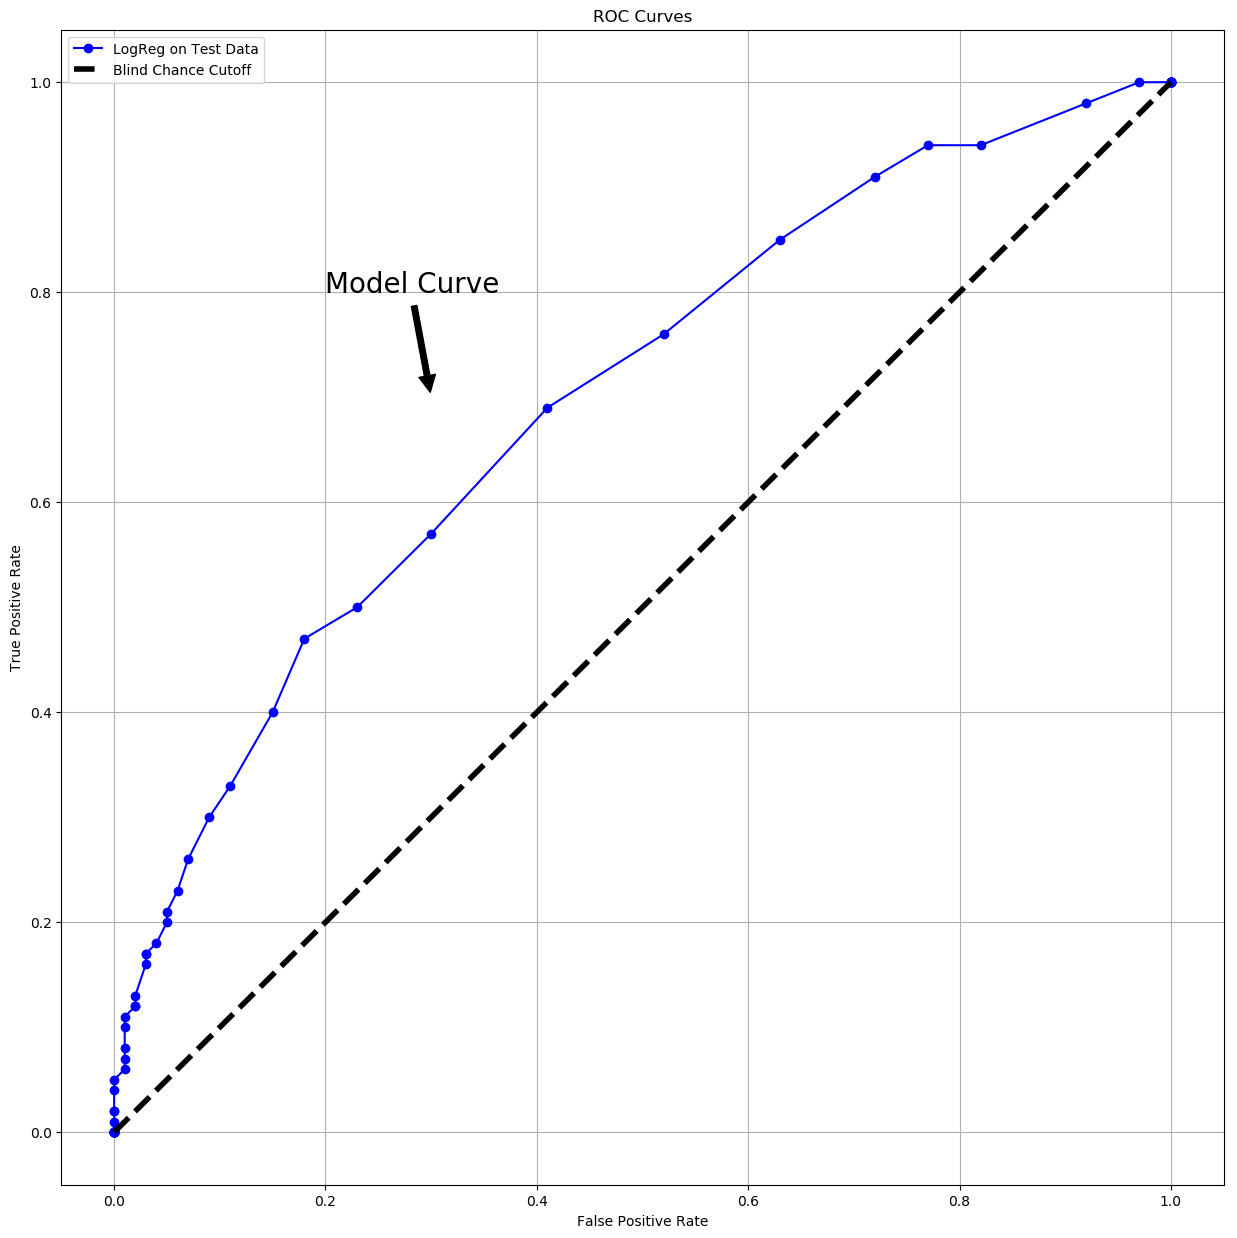

In [101]:
xgb_performance = roc_curve(gradient_boost)

## Model Reduction in Gradient Boosting

What if we got rid of the features that didn't help gain insight?

In [81]:
learners = gradient_boost.feature_importances_.argsort()[::-1]
features = pd.DataFrame(df.columns[learners], gradient_boost.feature_importances_[learners]).reset_index()

In [82]:
features.columns = ['importance','feature']

In [86]:
features.head(25)

,importance,feature
0,0.031649,AssignedPlanCount
1,0.023196,DaysTicketOpenAfterSubStart
2,0.023128,FirstTicketAge
3,0.022993,MaxCloseTime
4,0.022452,MacL28Usage_Percent
5,0.020288,TotalUsers
6,0.018395,TotalFeedbacks
7,0.017854,Win10L28Usage_Percent
8,0.017583,CommerceTenantTagsCount
9,0.016298,EXOEnabledUsers


In [88]:
X_train = X_train.loc[:,features[features.importance>0].feature]
X_test = X_test.loc[:,features[features.importance>0].feature]

In [89]:
gradient_submodel = xgb.XGBClassifier(learning_rate=0.01, gamma=1, n_jobs=4,
                                   max_depth=8, min_child_weight=7,
                                  colsample_bytree=0.6, subsample=0.5)

#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)
gradient_submodel.fit(X_train,Y_train)
new_pred_class = gradient_submodel.predict(X_test)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)

Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print(Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]))

Predicted    0   1
Det_1             
0          842   5
1          138  15
0.75


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [90]:
X_train = X_train_original.loc[:,features[features.importance>0].feature]
X_test = X_test_original.loc[:,features[features.importance>0].feature]
gradient_boost.fit(X_train,Y_train_original)
new_pred_class = gradient_boost.predict(X_test)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print('Precision: ',Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]))
print('Classification Rate :',round(Log_MM_Output.iloc[:,1].sum()/len(Y_test_original),3))

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicted      0    1
Det_1                
0          54336  374
1           9967  531
Precision:  0.5867403314917127
Classification Rate : 0.014


This does not help with larger data.

In [ ]:
X_train = X_train_original.loc[:,features[features.importance>0].feature]
X_test = X_test_original.loc[:,features[features.importance>0].feature]
gradient_boost.fit(X_train,Y_train_original)
new_pred_class = gradient_boost.predict(X_test)
#Pdata = pd.read_csv("/data/DetractorPrediction/Deta1_pred.csv",index_col=None)
#new_pred_class = logreg.predict(Pdata)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print('Precision: ',Log_MM_Output.iloc[1,1]/(Log_MM_Output.iloc[0,1]+Log_MM_Output.iloc[1,1]))
print('Classification Rate :',round(Log_MM_Output.iloc[:,1].sum()/len(Y_test_original),3))

* The following models take more time/memory to compute (I do not yet have access to AzureML, etc) so I will create a smaller dataset to work with

In [14]:
sub_df = df.sample(10000)

In [15]:
sum(sub_df.Det_1)/len(sub_df)

0.1667

In [16]:
#df= pd.read_csv('data/')
y = sub_df.Det_1
X=sub_df.drop('Det_0',  axis=1)
X=X.drop('Det_1',  axis=1)
feature_cols=X.columns
print(feature_cols)

Index(['EXOEnabledUsers', 'LicensedUsers', 'LYOEnabledUsers',
       'SPOEnabledUsers', 'OD4BEnabledUsers', 'ProPlusEnabledUsers',
       'TotalUsers', 'EDUSubscriptionsCount', 'ExchangeSubscriptionsCount',
       'LyncSubscriptionsCount',
       ...
       'O365TenantReleaseTrack_No_Data',
       'O365TenantReleaseTrack_StagedRollout', 'DefaultDataLocation_APC',
       'DefaultDataLocation_AUS', 'DefaultDataLocation_EUR',
       'DefaultDataLocation_GBR', 'DefaultDataLocation_IND',
       'DefaultDataLocation_JPN', 'DefaultDataLocation_NAM',
       'DefaultDataLocation_No_Data'],
      dtype='object', length=608)


# Model 5: Support Vector Machines

In [50]:
svc = SVC()
svc.fit(X_train,Y_train)
new_pred_class = svc.predict(X_test)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Predicted     0
Det_1          
0.0        3353
1.0         647


In [41]:
svc = LinearSVC(C=1.0)
svc.fit(X_train,Y_train)
new_pred_class = svc.predict(X_test)
columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
pr(svc,Y_train,X_train,0.5,summary=True)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Predicted      0    1
Det_1                
0          68185  187
1          12864  273


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [ ]:
svc = OneClassSVM()
svc.fit(X_train,Y_train)
new_pred_class = svc.predict(X_test)
columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [154]:
svc_smote = SVC(C=1.0)
svc_smote.fit(os_smote_X,os_smote_Y)
svc_smote.predict(X_test_original)
columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
#precision_metrics(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NameError: name 'svc' is not defined

The Support Vector Classifier takes the longest to train of all of the models, and by it is supposed to work better for data consisting of mostly continuous variables, which is not a characteristic that can be said of this detractor data. 

# Model 6: Naive Bayes

In [27]:
nb = GaussianNB()
nb.fit(X_train_original,Y_train_original)
new_pred_class = nb.predict(X_test_original)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print(pr(nb,Y_test_original,X_test_original,0.5,summary=True))
print(nb.class_prior_)

Predicted     0      1
Det_1                 
0          1094  26255
1            97   5158
{'true_positive': 0.98, 'false_positive': 0.96, 'accuracy': 0.19, 'precision': 0.16, 'recall': 0.98, 'classification_rate': 0.963, 'f1': 0.28}
[0.83883489 0.16116511]


In [24]:
nb = ComplementNB(class_prior=[0.85,0.15], fit_prior=True)
nb.fit(X_train,Y_train)
new_pred_class = nb.predict(X_test)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print(pr(nb,Y_test_original,X_test_original,0.5,summary=True))
print(nb.class_prior)

Predicted      0      1
Det_1                  
0          47498  20874
1           6993   6144
{'true_positive': 0.47, 'false_positive': 0.31, 'accuracy': 0.66, 'precision': 0.23, 'recall': 0.47, 'classification_rate': 0.331, 'f1': 0.31}
[0.85, 0.15]


In [28]:
for i in [0.1,0.25,0.5,0.75,0.99]:
    nb = ComplementNB(class_prior=[0.85,0.15], fit_prior=True,alpha=i)
    nb.fit(X_train_original,Y_train_original)
    new_pred_class = nb.predict(X_test_original)

    columns_new = ['Predicted']
    pred=pd.DataFrame(new_pred_class, columns=columns_new)
    Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
    #pdf= Predoutput.pred.value_counts()
    #print(pdf)
    #Check=Log_MM_Output
    Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
    print(Log_MM_Output)
    print(pr(nb,Y_test_original,X_test_original,0.5,summary=True))
    print(nb.class_prior)

Predicted      0     1
Det_1                 
0          19041  8308
1           2819  2436
{'true_positive': 0.46, 'false_positive': 0.3, 'accuracy': 0.66, 'precision': 0.23, 'recall': 0.46, 'classification_rate': 0.33, 'f1': 0.31}
[0.85, 0.15]
Predicted      0     1
Det_1                 
0          19041  8308
1           2819  2436
{'true_positive': 0.46, 'false_positive': 0.3, 'accuracy': 0.66, 'precision': 0.23, 'recall': 0.46, 'classification_rate': 0.33, 'f1': 0.31}
[0.85, 0.15]
Predicted      0     1
Det_1                 
0          19041  8308
1           2819  2436
{'true_positive': 0.46, 'false_positive': 0.3, 'accuracy': 0.66, 'precision': 0.23, 'recall': 0.46, 'classification_rate': 0.33, 'f1': 0.31}
[0.85, 0.15]
Predicted      0     1
Det_1                 
0          19042  8307
1           2821  2434
{'true_positive': 0.46, 'false_positive': 0.3, 'accuracy': 0.66, 'precision': 0.23, 'recall': 0.46, 'classification_rate': 0.329, 'f1': 0.31}
[0.85, 0.15]
Predicted      

In [37]:
nb = BernoulliNB(class_prior=[0.85,0.15],fit_prior=True)
nb.fit(X_train_original,Y_train_original)
new_pred_class = nb.predict(X_test_original)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
print(pr(nb,Y_test_original,X_test_original,0.5,summary=True))
print(nb.class_prior)

Predicted      0     1
Det_1                 
0          19542  7807
1           3126  2129
{'true_positive': 0.41, 'false_positive': 0.29, 'accuracy': 0.66, 'precision': 0.21, 'recall': 0.41, 'classification_rate': 0.305, 'f1': 0.28}
[0.85, 0.15]


In [30]:
for model in [GaussianNB(), ComplementNB(), BernoulliNB()]:
    model.fit(X_train,Y_train)
    print(pr(model,Y_test,X_test,0.5,summary=True))


{'true_positive': 0.98, 'false_positive': 0.96, 'accuracy': 0.19, 'precision': 0.16, 'recall': 0.98, 'classification_rate': 0.962, 'f1': 0.28}
{'true_positive': 0.46, 'false_positive': 0.3, 'accuracy': 0.66, 'precision': 0.23, 'recall': 0.46, 'classification_rate': 0.33, 'f1': 0.31}
{'true_positive': 0.41, 'false_positive': 0.29, 'accuracy': 0.66, 'precision': 0.22, 'recall': 0.41, 'classification_rate': 0.31, 'f1': 0.29}


In [ ]:
nb_smote = ComplementNB(priors=None)
nb_smote.fit(os_smote_X,os_smote_Y)
new_pred_class = nb_smote.predict(X_test_original)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

# Model 7: K-Nearest Neighbors

In [55]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,Y_train)
new_pred_class = knn.predict(X_test)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

Predicted     0   1
Det_1              
0          2436  92
1           450  22
Precision:  0.19
Recall:  0.05
F1:  0.08
Classification Rate : 0.003


In [153]:
knn_smote = KNeighborsClassifier(n_jobs=-1)
knn_smote.fit(os_smote_X,os_smote_Y)
new_pred_class = knn_smote.predict(X_test_original)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Predicted      0      1
Det_1                  
0          11634  15635
1           1676   3659
Precision:  0.19
Recall:  0.69
F1:  0.3
Classification Rate : 0.592


# Model 8: Stochastic Gradient Classifier

In [12]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model = SGDClassifier()
#parameters
params = {'loss': ["hinge", "log", "perceptron"],
          'alpha':[0.01,0.001, 0.0001, 0.00001]}
#carrying out grid search
clf = GridSearchCV(model, params, n_jobs=-1, verbose=7, scoring='f1', refit=False)
clf.fit(X_train_original,Y_train_original)
#the selected parameters by grid search

In [18]:
print(clf.best_params_,clf.best_score_)

{'alpha': 0.0001, 'loss': 'perceptron'} 0.28178900830371684


In [ ]:
sg = SGDClassifier(alpha=0.0001,loss='perceptron',random_state=42)
sg.fit(os_smote_X,os_smote_Y)
pred = sg.predict(X_test_original)

print(classification_report(Y_test_original, pred))
print(accuracy_score(Y_test_original, pred))

In [24]:
columns_new = ['Predicted']
pred=pd.DataFrame(pred, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test_original).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)
precision_metrics(Log_MM_Output)

Predicted      0      1
Det_1                  
0          16248  11101
1           2187   3068
Precision:  0.22
Recall:  0.58
F1:  0.32
Classification Rate : 0.435


# Model 9: Neural Networks

In [21]:
logistic = LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

classifier.fit(X_train,Y_train)
new_pred_class = classifier.predict(X_test)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -202.22, time = 7.87s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -95.54, time = 8.74s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -93.53, time = 8.61s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -89.58, time = 8.60s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -87.51, time = 8.69s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -92.96, time = 8.61s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -81.43, time = 8.71s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -82.12, time = 8.90s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.07, time = 8.70s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -81.20, time = 8.83s


C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Predicted     0  1
Det_1             
0          1679  0
1           320  1


In [ ]:
nn2 = MLPClassifier(random_state=0)
nn2.fit(X_train,Y_train)
new_pred_class = nn2.predict(X_test)

columns_new = ['Predicted']
pred=pd.DataFrame(new_pred_class, columns=columns_new)
Check= pd.concat([pd.DataFrame(Y_test).reset_index(), pred], axis = 1)
#pdf= Predoutput.pred.value_counts()
#print(pdf)
#Check=Log_MM_Output
Log_MM_Output=pd.crosstab(Check.Det_1, Check.Predicted)
print(Log_MM_Output)

In [29]:
pr(nn2,Y_test,X_test,0.5,summary=True)

{'true_positive': 0.2,
 'false_positive': 0.09,
 'accuracy': 0.79,
 'precision': 0.29,
 'recall': 0.2,
 'classification_rate': 0.108,
 'f1': 0.24}

In [ ]:
roc_curve(nn2, Y_test, X_test)

In [ ]:
mlp = MLPClassifier(random_state=0)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.005, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, scoring='precision',verbose=10,cv=3)
clf.fit(X_train,Y_train)
print('Best parameters found:\n', clf.best_params_,clf.best_score_)

In [ ]:
mlp = MLPClassifier(random_state=0)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam' ,'lbfgs'],
    'alpha': [0.0001, 0.005, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, scoring='neg_log_loss',verbose=10,cv=3)
clf.fit(X_train,Y_train)
print('Best parameters found:\n', clf.best_params_,clf.best_score_)

# Precision-Recall Curves per Model

Average precision-recall score: 0.33


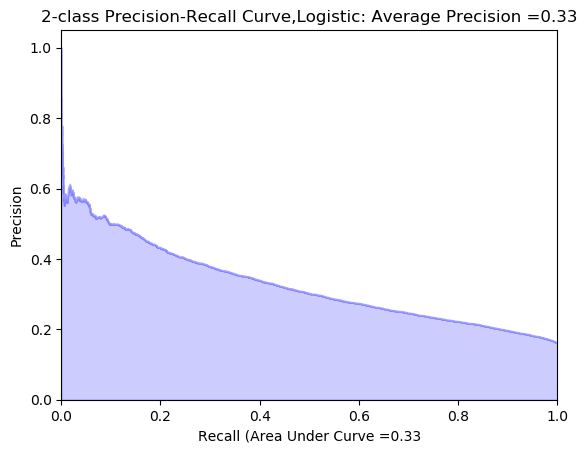

Average precision-recall score: 0.26


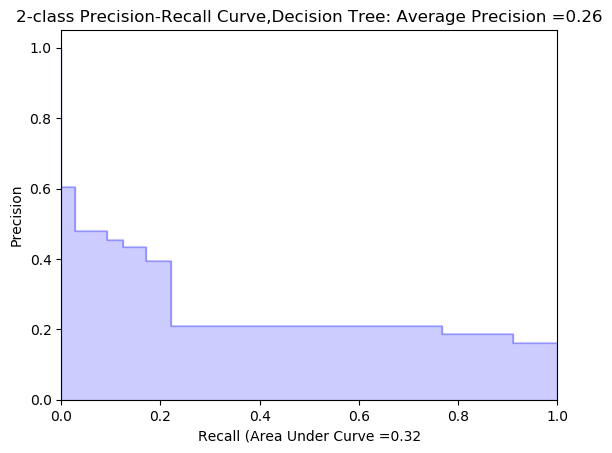

Average precision-recall score: 0.29


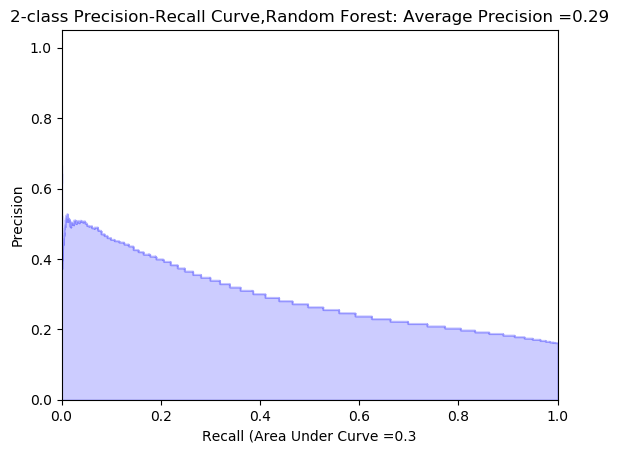

Average precision-recall score: 0.33


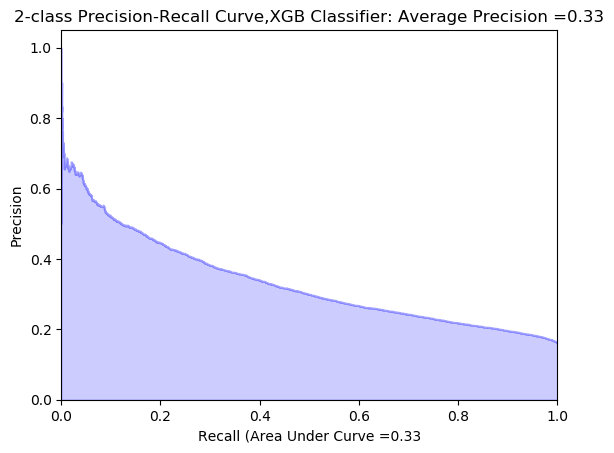

In [53]:
def precision_curve(model,X_test,Y_test,X_train,Y_train,title=''):   
    model.fit(X_train,Y_train)
    Y_score = model.predict_proba(X_test)[:,1]

    average_precision = average_precision_score(Y_test, Y_score)

    print('Average precision-recall score: {0:0.2f}'.format(
          average_precision))

    precision, recall, _ = precision_recall_curve(Y_test, Y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall - Area Under Curve ='+str(round(auc(recall,precision),2)))
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall Curve,'+title+': Average Precision ={0:0.2f}'.format(
              average_precision))
    plt.show()
    
for model,model_name in zip([logreg,optimal_tree,rf,gradient_boost],
                            ['Logistic','Decision Tree','Random Forest','XGB Classifier']):
    precision_curve(model,X_test_original,Y_test_original,X_train_original,Y_train_original,model_name)

# Saving Models:

In [84]:
gradient_boost.save_model('xgb_tenant.pkl')

For Logistic/RandomForest Models:

In [ ]:
import pickle

In [9]:
# Dump the trained classifier with Pickle
test_pkl_filename = 'test_model.pkl'
# Open the file to save as pkl file
test_model_pkl = open(test_pkl_filename, 'wb')
pickle.dump(test_model, test_model_pkl)
# Close the pickle instances
test_model_pkl.close()

In [12]:
model_pkl = open(test_pkl_filename, 'rb')
model = pickle.load(model_pkl)

# PCA On Training Data

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=100, svd_solver='full')
pca.fit(X)    

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [14]:
>>> print(pca.explained_variance_ratio_) 

[0.36546478 0.12070415 0.02812398 0.02620804 0.02320871 0.02107187
 0.01739441 0.01445162 0.0140577  0.01278469 0.01245108 0.01195182
 0.01119531 0.00973105 0.00927779 0.00825153 0.00759923 0.00730532
 0.0071845  0.00668362 0.00659452 0.00647457 0.00645407 0.00599432
 0.00575241 0.00557057 0.00546745 0.00524931 0.0051162  0.00485367
 0.00447889 0.00435265 0.00420206 0.00408651 0.00398828 0.00382824
 0.0037937  0.00368562 0.00357615 0.00350005 0.00347698 0.00341365
 0.00334154 0.00331489 0.00318664 0.00312452 0.0030415  0.00301823
 0.00291179 0.00286248 0.00275789 0.0026913  0.0026583  0.00246498
 0.00242763 0.00241329 0.0023784  0.00236214 0.00229201 0.00220686
 0.00216507 0.00213323 0.00207423 0.00204011 0.00199533 0.00192452
 0.00191581 0.00186968 0.00185471 0.00184411 0.00179787 0.0017636
 0.00173687 0.00170269 0.00166718 0.00164985 0.00161681 0.00157808
 0.00155362 0.00153943 0.00151416 0.00147036 0.00144101 0.00142432
 0.00140471 0.00139721 0.00134454 0.00132618 0.00129123 0.00128

In [ ]:
 >>> print(pca.singular_values_)  

In [ ]:
pca.explained_variance_

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
len(df), len(X)

(326036, 326036)

In [39]:
pca = PCA(n_components=2, svd_solver='full')
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
len(principalDf)

326036

In [40]:
principalDf.rename(columns={0:'principal component 1', 1:'principal component 2'}, inplace=True)

In [41]:
finalDf = pd.concat([principalDf.iloc[:,0:2], df[['Det_1']]], axis = 1)

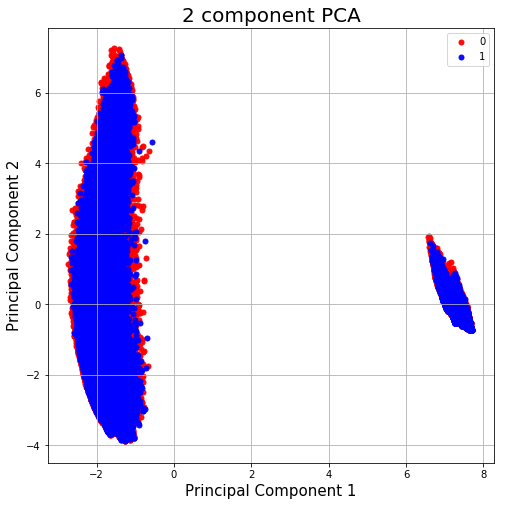

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Det_1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 25, alpha = 0.95)
ax.legend(targets)
ax.grid()

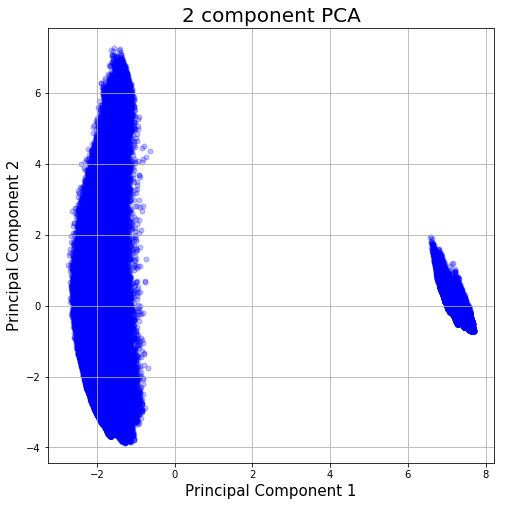

In [45]:
training_targets = finalDf[finalDf['Det_1'] == 0]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: Regular Class', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = 'b'
            , s = 25, alpha = 0.25)
ax.grid()

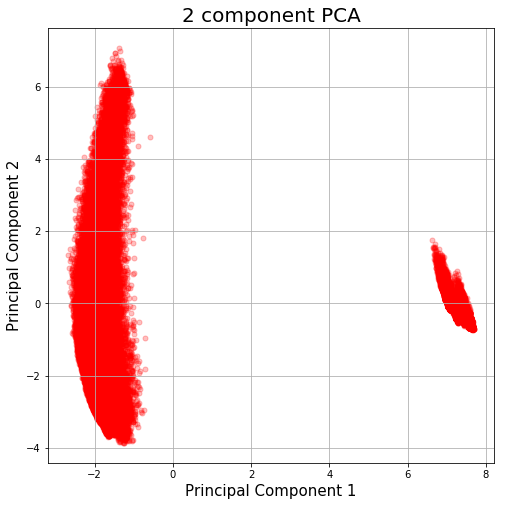

In [46]:
training_targets = finalDf[finalDf['Det_1'] == 1]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: Target Class', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = 'r'
            , s = 25, alpha = 0.25)
ax.grid()

In [27]:
from sklearn.cluster import KMeans

In [47]:
X[df.Det_1==1]

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,O365TenantReleaseTrack_No_Data,O365TenantReleaseTrack_StagedRollout,DefaultDataLocation_APC,DefaultDataLocation_AUS,DefaultDataLocation_EUR,DefaultDataLocation_GBR,DefaultDataLocation_IND,DefaultDataLocation_JPN,DefaultDataLocation_NAM,DefaultDataLocation_No_Data
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
29,0.380897,0.383624,0.344433,0.346836,0.346836,0.251520,0.403641,0.000000,0.267628,0.179828,...,1,0,0,0,0,0,0,0,0,1
30,0.090140,0.090140,0.091185,0.091185,0.091185,0.094522,0.104635,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
36,0.709323,0.668882,0.463272,0.412851,0.618241,0.640746,0.763940,0.000000,0.267628,0.226917,...,0,1,0,0,0,0,0,0,0,1
37,0.000000,0.238213,0.000000,0.240974,0.240974,0.249794,0.251680,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
38,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045064,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
41,0.273399,0.273398,0.276568,0.276567,0.276567,0.229593,0.280694,0.000000,0.115261,0.113459,...,1,0,0,0,0,0,0,0,0,1
54,0.000000,0.265130,0.000000,0.267079,0.267079,0.000000,0.301319,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X[df.Det_1==1])
k_labels = pd.Series(kmeans.labels_)

In [51]:
print(len(k_labels)), print(len(training_targets))

52546
52546


(None, None)

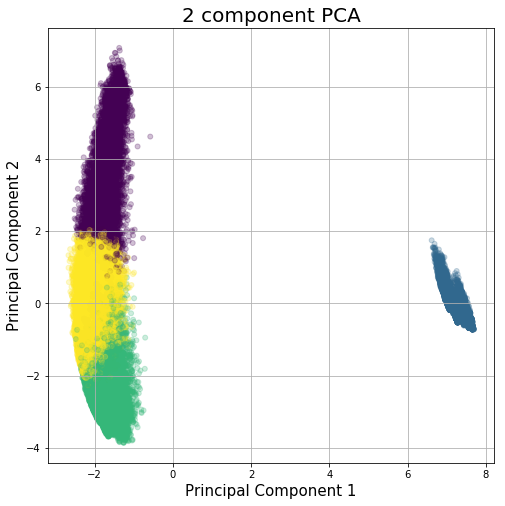

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = k_labels
            , s = 25, alpha = 0.25)
ax.legend(k_labels.unique())
ax.grid()

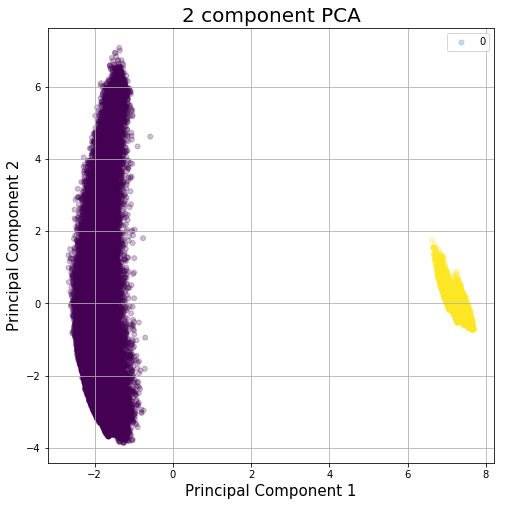

In [56]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X[df.Det_1==1])
k_labels = pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = k_labels
            , s = 25, alpha = 0.25)
ax.grid()

In [58]:
df.head()

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,O365TenantReleaseTrack_No_Data,O365TenantReleaseTrack_StagedRollout,DefaultDataLocation_APC,DefaultDataLocation_AUS,DefaultDataLocation_EUR,DefaultDataLocation_GBR,DefaultDataLocation_IND,DefaultDataLocation_JPN,DefaultDataLocation_NAM,DefaultDataLocation_No_Data
0,0.243032,0.243031,0.157724,0.163447,0.163447,0.169429,0.248913,0.0,0.115261,0.000000,...,1,0,0,0,0,0,0,0,0,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
2,0.298786,0.299438,0.301581,0.301580,0.301580,0.304501,0.319864,0.0,0.323579,0.318519,...,1,0,0,0,0,0,0,0,0,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1
4,0.187939,0.194789,0.190117,0.197047,0.197047,0.197075,0.381949,0.0,0.115261,0.113459,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
k_labels = pd.Series(kmeans.labels_)
df['cluster_label'] = k_labels
cluster_dict = {}
for i, cluster in enumerate(sorted(df.cluster_label.unique()):
    cluster_dict['Cluster_'+str(i+1)] = df[df.cluster_label==cluster]

distributions = pd.DataFrame()
for key in cluster_dict.keys():
    distributions[key] = cluster_dict[key].nunique()
                            
modes = df.groupby(['cluster_label'])[StrTo_Cat].apply(pd.DataFrame.mode)
same_per_cluster = modes.columns[modes.nunique()==1] #Filter by Categories with differences between clusters
modes.drop(same_per_cluster,axis=1,inplace=True)
                                
means = df.groupby(['cluster_label'])[Emptyto_Zero].mean()
                                
medians = df.groupby(['cluster_label'])[Emptyto_Zero].median()

In [ ]:
empty_to_zero = open("Emptyto_Zero.txt","r")
Emptyto_Zero = empty_to_zero.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
empty_to_zero.close()
str_to_cat = open("StrTo_Cat.txt","r")
StrTo_Cat = str_to_cat.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
str_to_cat.close()

In [ ]:
def compare_clusters(df,df_scale, num_cluster):
    X = df_scale.drop(list(df_1.filter(regex = 'Det')), axis = 1, inplace = True)
    '''Appends clusters to dataset and generates statistics on differences between Clusters'''
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(X[df_scale.Det_1==1])
    k_labels = pd.Series(kmeans.labels_)
    df['cluster_label'] = k_labels
    cluster_dict = {}
    for i, cluster in enumerate(sorted(df.cluster_label.unique()):
        cluster_dict['Cluster_'+str(i+1)] = df[df.cluster_label==cluster]

    distributions = pd.DataFrame()
    for key in cluster_dict.keys():
        distributions[key] = cluster_dict[key].nunique()
                            
    modes = df.groupby(['cluster_label'])[StrTo_Cat].apply(pd.DataFrame.mode)
    same_per_cluster = modes.columns[modes.nunique()==1] #Filter by Categories with differences between clusters
    modes.drop(same_per_cluster,axis=1,inplace=True)
                                
    means = df.groupby(['cluster_label'])[Emptyto_Zero].mean()
                                
    medians = df.groupby(['cluster_label'])[Emptyto_Zero].median()
                                
    return distributions, modes, means, medians

In [ ]:
compare_clusters(df,k_labels)                